<a href="https://colab.research.google.com/github/bhagirathbhard/Netflix-Content-Analysis/blob/nightly/A7-Netflix-Content-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

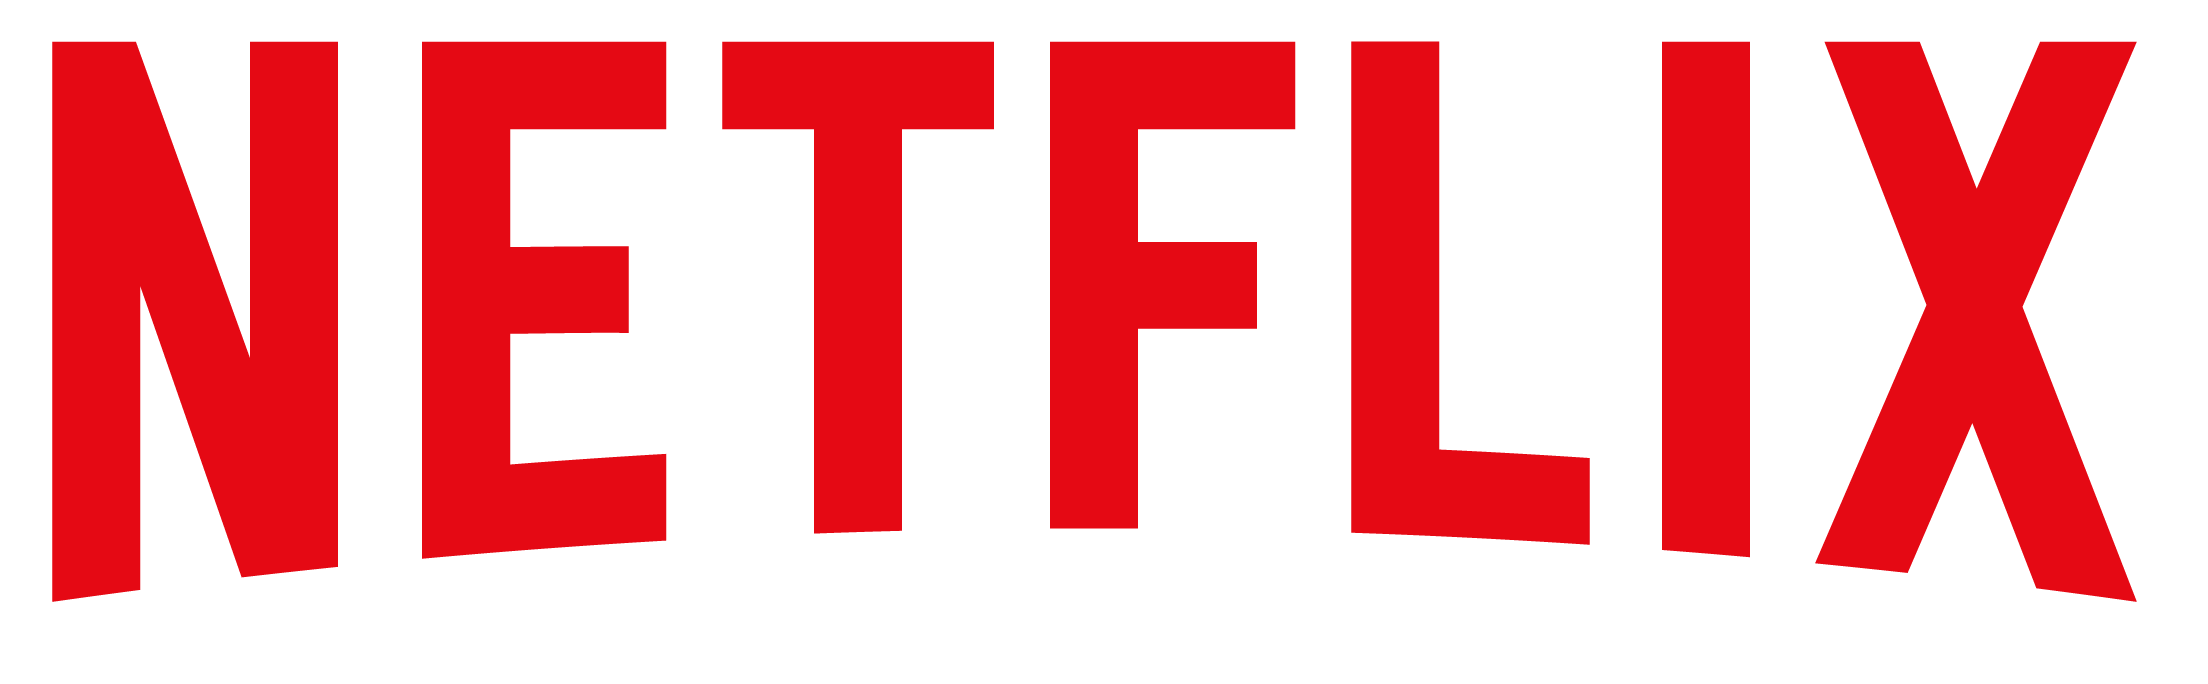

# **<span style="color:#023e8a;font-size:200%"><center>Netflix Content Analysis</center></span>**

## <center>Bhagirath Bhardwaj, Jinisha Kande, Paulin Jesintha Mariadoss, Renata Halim, Sohil Jain, and Sonal Kaur</center>

# **<span id="Project-Overview" style="color:#023e8a;">Project and Dataset Overview</span>**


Netflix is known to be one of the best internet media and entertainment streaming companies. Over the years, it has faced several challenges and overcome a shift in demographics, changing viewership styles and choices. 

Netflix’s content library and its recommendations engine play a big role in influencing the content consumed by people worldwide. Research from Netflix shares that over 80% of the content watched on their platform came from their recommendations engine. 

While Netflix has enjoyed a long period of success as the sole pioneer of the internet media streaming industry, **things have changed**. There is fierce competition in the market such as `Disney+`, `Amazon Prime Video`, `HBO Max`, and others. 

In addition, Netflix is facing trouble in holding on to the content that people watch and enjoy as they are licensed under the other streaming platforms. 

>  Tip! Use the Table of Contents to browse the notebook

# **<span id="Motivation" style="color:#023e8a;">Motivation</span>**



**Our team act as hypothetical analysts working at Netflix, who have been tasked by their manager to -**

* Review all available datasets,
* Visualize them, 
* Study the changes in Netflix’s content strategy over the years and lastly,
* Come with top 3 recommendations that could be inferred.


# **<span id="summary" style="color:#023e8a;">Report Summary</span>**


## **Report Findings**

The report has a couple of findings that are discussed in depth in the conclusion section. The key findings are -

*   Netflix has been investing more in TV shows than movies over the years.
*   Netflix focuses on producing content in English, followed by Spanish and Japanese.
*   Netflix focuses on producing content in the US, followed by India and the UK.
*   Netflix generally produces content in the genres of Drama, Comedy, and Documentary.
*   Netflix has been producing more content in the last 5 years than in the previous 5 years.
*   Netflix stock price has been increasing over the years. However, the stock price has been decreasing since the start of 2020 due to the COVID-19 pandemic and rising competition from other streaming platforms such as Disney+ and Amazon Prime Video.
*   Netflix subscribers have been increasing over the years. However, the number of subscribers has been decreasing since the start of 2020 due to the COVID-19 pandemic and rising competition from other streaming platforms such as Disney+ and Amazon Prime Video.
*   Netflix has to change its stance on ad-supported content to increase its subscriber base and revenue.

## **Report Recommendation Summary**

The report finds the following top three recommendations from its analysis - 

*  Producing more Netflix Originals content
*  Create an Ad-supported subscription model
*  Capitalize more on the existing subscriber base

# **<span id="Data-Sources" style="color:#023e8a;">Data Sources</span>**


Our dataset was captured using a combination of tools and methods; scraping, API calls, and manual validation. Using these techniques, the author of the original dataset, Shivam Bansal, was able to capture information on a myriad of topics, namely on Netflix shows, movie titles, directors, casts, countries, release dates, ratings, and more. 

In total, our main dataset has `12` columns and `8807` rows.

**Sources** -

1.   [Netflix-Shows by Shivam Bansal](https://www.kaggle.com/datasets/shivamb/netflix-shows)

>  [Clarification of Source of dataset by Author](https://twitter.com/shivamshaz/status/1452642649442172931?s=20&t=OSh8EM8VNMZhmXSi6aBgtA)



---


In addition, the team scraped the following sources to get - 

* Netflix and other companies Stock Information using `yFinance` API
* Netflix Subscriber Count per Region and Quarters
* Netflix Subscriber Count per Country and Population
* Netflix Originals Programming Scraped Data-set


**Sources** -
2. [yFinance API - Market Data from finance.yahoo.com](https://finance.yahoo.com/)
3. [Scraped Data - Netflix Original Programming](https://en.wikipedia.org/wiki/List_of_ended_Netflix_original_programming)
4. [Scraped Data - Netflix Subscriber Count per Region and Quarters](https://www.comparitech.com/tv-streaming/netflix-subscribers/)
5. [Scraped Data - Netflix Subscriber Count per Country and Population](https://www.comparitech.com/tv-streaming/netflix-subscribers/)
6. [Scraped Data - Netflix vs Disney+ Subscriber Count](https://atlas.jifo.co/api/connectors/353c6973-eb8f-483a-a56b-598111522757)

## Dataset Descriptions

In this project we utlize multiple datasets, a brief summary of all of them are as follows:

| Dataframe Name     | Brief Description |
| ----------- | ----------- |
| `netflix_ds` | Dataset containing a list of all tv shows and movies hosted on Netflix over the years.       |
| `netflix_originals_drama_ds`   | Dataset scraped from Wikipedia for all |**Drama** Genre Shows **produced** by Netflix as a "Netflix Originals".|
| `faang` | `META`,`AMZN`,`NFLX`,`GOOG`,`AAPL` stock data from yFinance API |
| `revenue_growth_ds` | `NFLX` revenue growth from 2011-2022 per Quarter |
| `subscriber_growth` | Netflix vs Disney+ Subscriber Growth Count |
` subscriber_growth_region` | Netflix Subscriber Growth per Region and Quarter from `2018`. |
| `population_subscribers` | Netflix Subscriber Count per Country and Population.     |



## Detailed Description per Dataset

### 1. `netflix_ds` - **Main Dataset**

| Column      | Brief Description |  Characteristic, Data type   | 
| ----------- | ----------- | ------- |
| `show_id`      | Unique `IDs` of each Movie and TV Show. Follows the syntax of `Sn` where `n` is the sr. number. (e.g. `S432`)      |  String, Unique, Primary Key, Not Null       |
| `type`   | Catagorical Variable defining if the row is for a `Movie` or `TV Show`        |   String, Not Null     |
| `title` | Title of the Movie or TV Show    | String, Not Null  |
| `director` |  Name of the Director of the Movie or TV Show   |    String    |
| `cast`     |  List of names of the Cast     |     String    |
| `country`   |    Country where the movie / show was produced    |     String   |
| `date_added`   |   Date it was added on Netflix   | Date Format     |
| `release_year`  |   Actual Release year of the move / show    |    Date Format |
| `rating`     |   TV Rating of the movie / show       |  Date Format    |
| `duration` |  Total Duration - in minutes or number of seasons| String  | 
| `listed_in` |   List of Genres under which the content was hosted by Netflix     |  String | 
| `description` |  The summary description     |  String   |
| `duration_min` | Derived from `duration` column, it lists the mins in int64 format for easy analysis. | Integer |
| `seasons` | Derived from `duration` column, it lists the seasons in int64 format for easy analysis | Integer |

We also created an ERD diagram for our main dataset for further details -

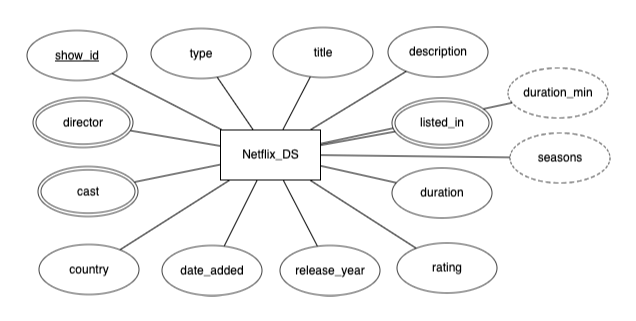

---

### Supplementary Datasets

#### 2. `netflix_originals_drama_ds`

| Column      | Brief Description |  Characteristic, Data type   | 
| ----------- | ----------- | ------- |
| `title`      | Title of the TV Show      |  String, Unique, Primary Key, Not Null       |
| `Genre`   | Specific Genre under the Drama Category of Netflix        |   String, Not Null     |
| `Premiere` | Date of Premiere of the TV Show   | Date Format  |
| `Finale` |  Date of the Finale of the TV Show   |    Date Format    |
| `Seasons` | Seasons and Episodes of the TV Show | String |
| `Runtime` | Duration | String |
| `Seasons_Only` | Manually split from `Seasons` column to only contain Seasons length | String |
| `Episodes` | Manually split from `Seasons` column to only contain total episodes | String |

#### 3. `faang`

| **Column**  | **Brief Description**                         | **Characteristic, Data Type** |
|-------------|-----------------------------------------------|-------------------------------|
| `Adj Close` | Adjusted Close price of FAANG at a given date | float64                       |
| `Close`     | Close price of FAANG at a given date          | float64                       |
| `High`      | High price of FAANG at a given date           | float64                       |
| `Low`       | Low price of FAANG at a given date            | float64                       |
| `Open`      | Open Close price of FAANG at a given date     | float64                       |
| `Volume`    | Volume price of FAANG at a given date         | float64                       |

#### 4. `revenue_growth_ds`


| **Column**                      | **Brief Description**         | **Characteristic, Data Type** |
|---------------------------------|-------------------------------|-------------------------------|
| `Quarter`                       | Quarter ((Q1-2011)-(Q3-2022)) | object/string                 |
| `Netflix Revenue (In millions)` | Revenue Amount in millions    | int64                         |

#### 5. `subscribers_growth`

| **Column**           | **Brief Description**                    | **Characteristic, Data Type** |
|----------------------|------------------------------------------|-------------------------------|
| `Quarter`            | Quarter            | object/string                 |
| `Netflix Subs.Count` | Netflix Subscriber Count at that quarter | int64                         |
| `Disney Subs.Count`  | Disney+ Subscriber Count at that quarter | int64                         |

#### 6. `subscribers_growth_region`

| **Column**                        | **Brief Description**                                          | **Characteristic, Data Type** |
|-----------------------------------|----------------------------------------------------------------|-------------------------------|
| `Area`                            | Quarter level information                                      | Object                        |
| `United States and Canada`        | Subscriber Count for the North American Region                 | int64                         |
| `Europe, Middle East, and Africa` | Subscriber Count for the Europe, Middle East and Africa Region | int64                         |
| `Latin America`                   | Subscriber Count for Latin America Region                      | int64                         |
| `Asia-Pacific`                    | Subscriber Count for Asia Pacific Region                       | int64                         |

#### 7. `population_subscribers`

| **Column**                                    | **Brief Description**                                  | **Characteristic, Data Type** |
|-----------------------------------------------|--------------------------------------------------------|-------------------------------|
| `Country`                                     | Country level information on Netflix                   | Object                        |
| `% of Population with a Netflix Subscription` | Netflix Subscriber Count divided by Country Population | float64                       |
| `# of Netflix Subscribers`                    | #Count of Netflix Subscribers                          | int64                         |
| `Population`                                  | #Population of the country                             | int64                         |

# **<span id="Data-Cleanup" style="color:#023e8a;">Data Import</span>**


In [27]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.style.use('dark_background')
import numpy as np
import seaborn as sns
#Inline plotting
%matplotlib inline

In [28]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!cd gdrive/Shareddrives/BA780/.kaggle/

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "gdrive/Shareddrives/BA780/.kaggle/"

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Fixing permissions, Chmod 600 (chmod a+rwx,u-x,g-rwx,o-rwx) sets permissions so that, (U)ser / owner can read, can write and can't execute. (G)roup can't read, can't write and can't execute. (O)thers can't read, can't write and can't execute.
! chmod 600 gdrive/Shareddrives/BA780/.kaggle/kaggle.json

In [ ]:
#Load dataset
!kaggle datasets download -d shivamb/netflix-shows --force

 75% 1.00M/1.34M [00:00<00:00, 1.40MB/s]
100% 1.34M/1.34M [00:00<00:00, 1.76MB/s]


In [ ]:
!unzip netflix-shows.zip

Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [ ]:
netflix_ds = pd.read_csv('netflix_titles.csv')

# **<span id="EDA" style="color:#023e8a;">Exploratory Data Analysis </span>**


In [ ]:
#Check basic data-set rows
netflix_ds.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
#Check dataset shape
netflix_ds.shape

(8807, 12)

In [ ]:
#Check Dataset info
netflix_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Describe dataset
netflix_ds.describe(include='object').transpose()

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


# **<span id="Data-Cleanup" style="color:#023e8a;">Data Cleanup</span>**



## **Handling null data**

In [ ]:
#Check Null Values per column
pd.isnull(netflix_ds).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We see that the columns `director`, `cast`, `country`,`date_added`,`rating`, and `duration` all have null values. We can decide how to manage them through 

*  Manual validation
*  Imputation with generic values
*  Dropping null values entirely.


Starting with `manual validation` on the `rating` column -

In [ ]:
#Rating Distribution
netflix_ds["rating"].value_counts()

TV-MA       3209
TV-14       2158
TV-PG        862
R            799
PG-13        491
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: Int64

In [ ]:
#Rating has duration (74 mins, 84 etc. needs to be cleaned and replaced)
netflix_ds[netflix_ds["rating"].isin(["74 min","84 min","66 min"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min,seasons,date_added_day


**External Manual Validation of Ratings**

| Title       | Rating as per IMDB |
| ----------- | ----------- |
| Louis C.K. 2017      | TV-MA       |
| Louis C.K.: Hilarious   | TV-MA        |
| Louis C.K.: Live at the Comedy Store | TV-MA |

In [ ]:
#Replacing the ratings from NaN
netflix_ds["rating"].replace(["74 min","84 min","66 min"], "TV-MA", inplace= True)

In [ ]:
netflix_ds[netflix_ds["rating"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min,seasons,date_added_day


**External Manual Validation of Ratings**

| Title       | Rating as per IMDB |
| ----------- | ----------- |
| 13TH: A Conversation with Oprah Winfrey & Ava DuVernay| TV-PG |
| Gargantia on the Verdurous Planet      | TV-14       |
| Little Lunch	   | TV-MA        |
| My Honor Was Loyalty	 | PG-13 |

In [ ]:
#Find location of the Movies and Shows and replace their ratings
netflix_ds[netflix_ds["title"] == "Little Lunch"] = netflix_ds[netflix_ds["title"] == "Little Lunch"].replace(np.nan, "TV-MA")
netflix_ds[netflix_ds["title"] == "13TH: A Conversation with Oprah Winfrey & Ava DuVernay"] = netflix_ds[netflix_ds["title"] == "13TH: A Conversation with Oprah Winfrey & Ava DuVernay"].replace(np.nan, "TV-PG")
netflix_ds[netflix_ds["title"] == "Gargantia on the Verdurous Planet"] = netflix_ds[netflix_ds["title"] == "Gargantia on the Verdurous Planet"].replace(np.nan, "TV-14")
netflix_ds[netflix_ds["title"] == "My Honor Was Loyalty"] = netflix_ds[netflix_ds["title"] == "My Honor Was Loyalty"].replace(np.nan, "PG-13")

In [ ]:
netflix_ds["rating"].value_counts(ascending=False)

TV-MA       3209
TV-14       2158
TV-PG        862
R            799
PG-13        491
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: Int64

`rating` column is now cleaned up, we then move on to `Imputation with generic values` for the `director`, `country`, and `cast` column.

In [ ]:
#Replacing and filling in director, cast, and country null values -
netflix_ds.fillna({'director': 'Not Listed', 'country': 'Not Listed', 'cast': 'Not Listed'}, inplace=True)
pd.isnull(netflix_ds).sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
duration_min      0
seasons           0
date_added_day    0
dtype: int64

We choose to further use `manual validation` on missing data of the `duration` column -

In [ ]:
#Checking the missing 3 durations
netflix_ds[netflix_ds['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min,seasons,date_added_day


In [ ]:
#Find location of the Movies and Shows and replace their duration from `NaN`.
#Data sourced from IMDB
netflix_ds[netflix_ds["title"] == "Louis C.K. 2017"] = netflix_ds[netflix_ds["title"] == "Louis C.K. 2017"].replace(np.nan, "74 mins")
netflix_ds[netflix_ds["title"] == "Louis C.K.: Hilarious"] = netflix_ds[netflix_ds["title"] == "Louis C.K.: Hilarious"].replace(np.nan, "84 mins")
netflix_ds[netflix_ds["title"] == "Louis C.K.: Live at the Comedy Store"] = netflix_ds[netflix_ds["title"] == "Louis C.K.: Live at the Comedy Store"].replace(np.nan, "66 mins")

In [ ]:
pd.isnull(netflix_ds).sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
duration_min      0
seasons           0
date_added_day    0
dtype: int64

As there is ambiguity around exact `date_added`, we choose to use the last method of `Dropping null values entirely` and drop the last 10 null values.

In [ ]:
#Dropping remaining null values
netflix_ds = netflix_ds.dropna()

In [ ]:
pd.isnull(netflix_ds).sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
duration_min      0
seasons           0
date_added_day    0
dtype: int64

## **Handling duplicate data**


In [ ]:
#Checking the data-set for any duplicates
netflix_ds.duplicated().sum()

0

We see that there are no duplicate rows in the dataset.

## **Addressing Column Data Types**

In [ ]:
#Data Type of dataset
netflix_ds.dtypes

show_id                   string
type                      string
title                     string
director                  string
cast                      string
country                   string
date_added        datetime64[ns]
release_year      datetime64[ns]
rating                    string
duration                  string
listed_in                 string
description               string
duration_min               Int64
seasons                    Int64
date_added_day            object
dtype: object

We see that the dataset is a mix of `object`, `int64` datatypes at the moment. However, we want to change this to the appropriate datatypes as per the description and content of each of the columns. 

We further analyze the dataset unique values per column to identify if they are catagorical, numerical, etc.

In [ ]:
#Unique values in each column
netflix_ds.nunique().sort_values(ascending=False)

show_id           8797
title             8797
description       8765
cast              7683
director          4532
date_added        1714
country            750
listed_in          513
duration           223
duration_min       206
release_year        74
seasons             16
rating              14
date_added_day       7
type                 2
dtype: int64

The dataset seems to be quite rich per each column with a lot of catagorical information to work with. We notice there are columns that clearly are `datetime64` format. 

We choose to update them so we are able to analyze it further later on -

In [ ]:
#Converting Date Added column and Release Year to datetime
netflix_ds['date_added'] = pd.to_datetime(netflix_ds['date_added'])
netflix_ds['release_year'] = pd.to_datetime(netflix_ds['release_year'], format='%Y')

In our review of the `object` data type, we found the following snippet from the documentation -


> Finally, arbitrary objects may be stored using the object dtype, but should be avoided to the extent possible (for performance and interoperability with other libraries and methods. See object conversion).

[Source Pandas Documentation](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes)



In [ ]:
#Using Convert dtypes
netflix_ds = netflix_ds.convert_dtypes()

We use `convert_dtypes` to convert the `object` data type to the appropriate data type. We also used `astype` to convert the `date_added` column to `datetime64` format. Doing so, we are able to analyze the data further later on. Documentation for `convert_dtypes` can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.convert_dtypes.html) and for `astype` can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html).

In [ ]:
netflix_ds.dtypes

show_id                   string
type                      string
title                     string
director                  string
cast                      string
country                   string
date_added        datetime64[ns]
release_year      datetime64[ns]
rating                    string
duration                  string
listed_in                 string
description               string
duration_min               Int64
seasons                    Int64
date_added_day            string
dtype: object

## **Creating new columns**

We use regex to extract the `duration_min` for movies where it is in `min` and then the `seasons` where it is in `seasons`.

In [ ]:
#Creating a new column `duration_min` to store the duration in minutes for easier analysis
netflix_ds['duration_min'] = netflix_ds['duration'].str.extract('(\d+) min').astype(str)
#Creating a new column `seasons` by extracting the number of seasons from the `duration` column
netflix_ds['seasons'] = netflix_ds['duration'].str.extract('(\d+) Seasons').astype(str)
netflix_ds['seasons'] = netflix_ds['duration'].str.extract('(\d+) Season').astype(str)

In [ ]:
#Replace the <NA> values with 0 in the `seasons` column
netflix_ds['seasons'] = netflix_ds['seasons'].replace('<NA>', '0')
#Replace the <NA> values with 0 in the `duration_min` column
netflix_ds['duration_min'] = netflix_ds['duration_min'].replace('<NA>', '0')
#Convert all values in seasons column to float
netflix_ds['seasons'] = netflix_ds['seasons'].astype(int)
#Convert all values in duration_min column to float
netflix_ds['duration_min'] = netflix_ds['duration_min'].astype(int)


In [ ]:
#Using Convert dtypes again
netflix_ds = netflix_ds.convert_dtypes()
netflix_ds.dtypes

show_id                   string
type                      string
title                     string
director                  string
cast                      string
country                   string
date_added        datetime64[ns]
release_year      datetime64[ns]
rating                    string
duration                  string
listed_in                 string
description               string
duration_min               Int64
seasons                    Int64
date_added_day            string
dtype: object

In [ ]:
netflix_ds.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min,seasons,date_added_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,0,Saturday
1,s2,TV Show,Blood & Water,Not Listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,2,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Listed,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,1,Friday


We now have two new columns, `duration_min` and `seasons`, that independently store either the duration of the movie in minutes or the number of seasons of the TV show. We subsequently convert the `duration_min` column to `int64` format for further analysis. We chose to separate the `duration` column into two columns as it is easier to analyze and visualize the data.

# **<span id="Questions" style="color:#023e8a;">Key Questions Answered</span>**

In the following section, we will review the dataset, answer the questions we set out to answer, and provide visualizations to support our findings. We will also provide a summary of our findings and recommendations at the end.

**Netflix branding color is `#e50914` and `#221f1f` for the background. We will use these colors for our visualizations.**

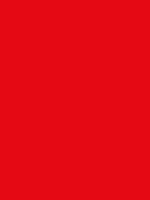

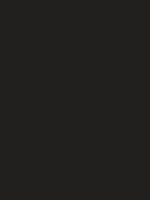

We start with reviewing the `netflix_ds` dataset and performing overall analysis and visualization of Netflix's content library.

## 1.   Overview of movies and TV shows by rating 



We first examined Netflix's content rating to give us a general idea of what Netflix's current content library looks like.

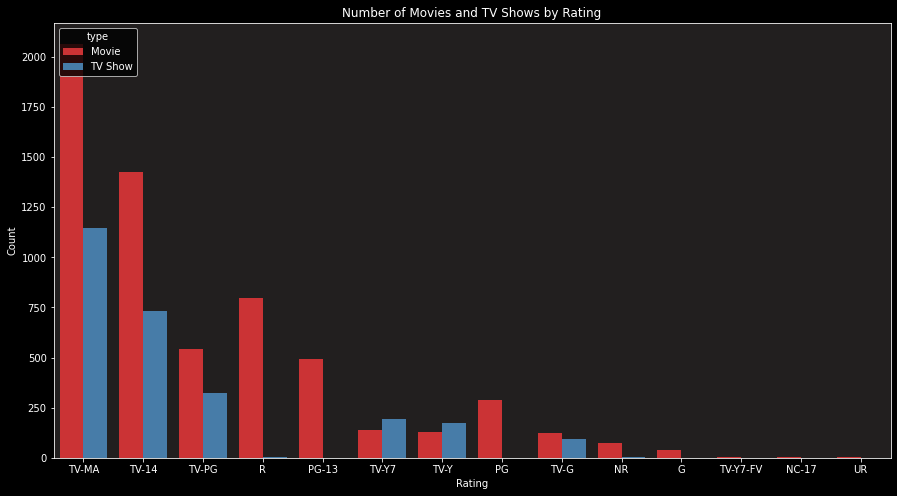

In [ ]:
#Dark Background snippet to fix colab bug
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
sns.countplot(x='rating', data=netflix_ds, order=netflix_ds['rating'].value_counts().index, hue='type', palette='Set1')
#Background color hex code for the plot
ax = plt.gca()
ax.set_facecolor('#221f1f')
#labeling
plt.title('Number of Movies and TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

From the distribution of movies and TV shows on Netflix based on ratings, we observe that `TV-MA` is the most popular rating across both movies and TV Shows; this indicates that Netflix is most likely to be **targeting adults**. 

We also observe that `TV-14` is the second most popular rating across movies and TV shows; this indicates that in addition to adults, Netflix is also targeting **teenagers and young adults**.

## 2. Time series analysis of movies and TV shows by year

Moving on, we performed a time series analysis of the movies and TV shows in the Netflix content library on the basis of release year.

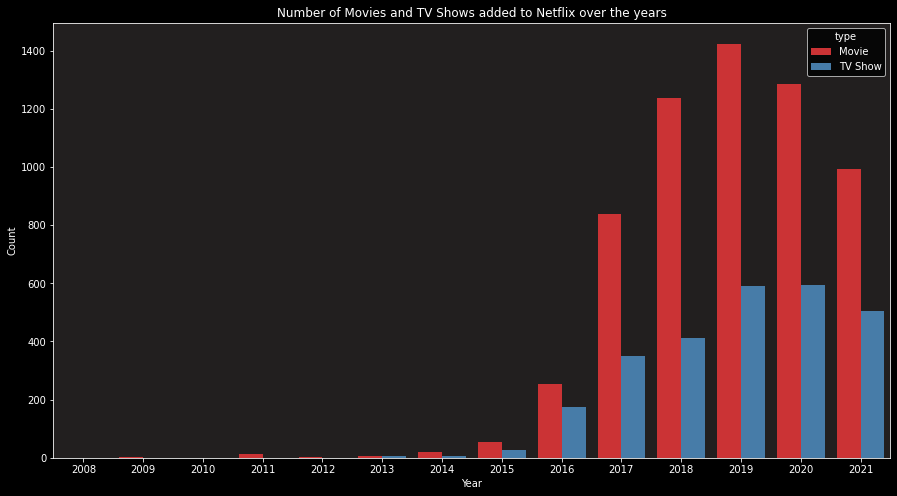

In [ ]:
#Dark Background snippet to fix colab bug
plt.style.use('dark_background')
#Plot the number of movies and TV shows added to Netflix over the years
plt.figure(figsize=(15,8))
sns.countplot(x=netflix_ds['date_added'].dt.year, data=netflix_ds, hue='type', palette='Set1')
#Background color hex code for the plot
ax = plt.gca()
ax.set_facecolor('#221f1f')
plt.title('Number of Movies and TV Shows added to Netflix over the years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

After 2016, there was a significant increase in the number of movies and TV shows added to Netflix. 
- Each year after 2017, 1000+ movies and TV shows were added to the platform every year. 

- The rate of **content addition peaked in 2019**, but this **momentum fell in 2020 and 2021 due to the pandemic**.

## 3. Top 10 duration of movies (minutes) and TV shows (seasons) on Netflix

More than just the addition of content, we conducted further analysis on the top 10 duration in minutes for movies and season lengths for TV shows on Netflix.

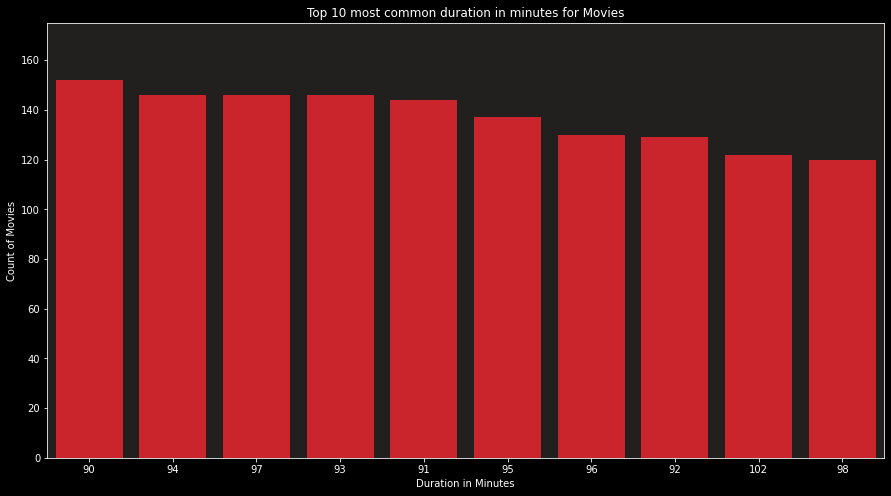

In [ ]:
#Black Background snippet to fix colab bug
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
sns.countplot(x='duration_min', data=netflix_ds[netflix_ds['type'] == 'Movie'], order=netflix_ds[netflix_ds['type'] == 'Movie']['duration_min'].value_counts().iloc[:10].index, color='#e50914')
#Background color hex code for the plot
ax = plt.gca()
ax.set_facecolor('#221f1f')
plt.title('Top 10 most common duration in minutes for Movies')
plt.xlabel('Duration in Minutes')
plt.ylim(0, 175)
plt.ylabel('Count of Movies')
plt.show()

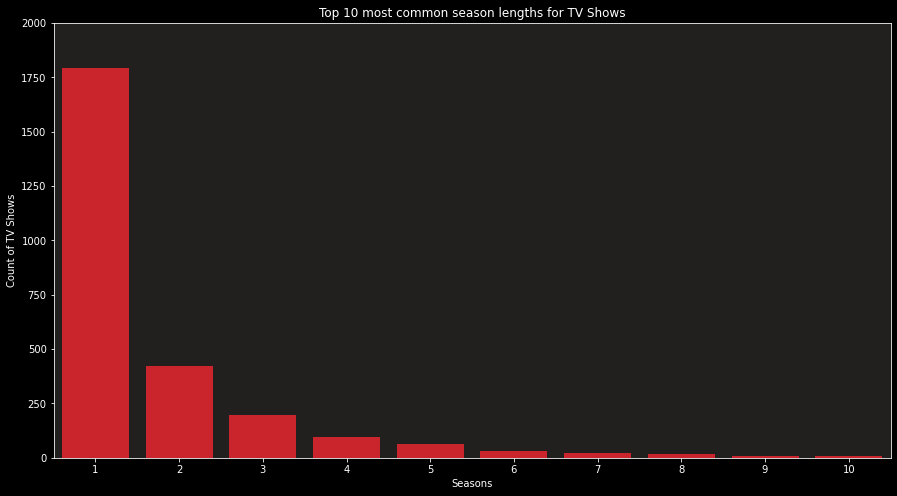

In [ ]:
#Black Background snippet to fix colab bug
plt.style.use('dark_background')
#Plot Top 10 most common season lengths for TV Shows
plt.figure(figsize=(15,8))
sns.countplot(x='seasons', data=netflix_ds[netflix_ds['type'] == 'TV Show'], order=netflix_ds[netflix_ds['type'] == 'TV Show']['seasons'].value_counts().iloc[:10].index, color='#e50914')
#Background color hex code for the plot
ax = plt.gca()
ax.set_facecolor('#221f1f')
plt.title('Top 10 most common season lengths for TV Shows')
plt.xlabel('Seasons')
plt.ylim(0, 2000)
plt.ylabel('Count of TV Shows')
plt.show()

We notice that the most preferred duration of movies on Netflix is between `80-100` mins. 

In addition, we observe that Netflix focuses on adding TV shows with shorter season lengths. The average season length for TV Shows on Netflix is `1.75` seasons. We know this to be true as many popular Netflix shows have short one-season series.

## 4. Distribution of Movies and TV Shows by Genre on Netflix

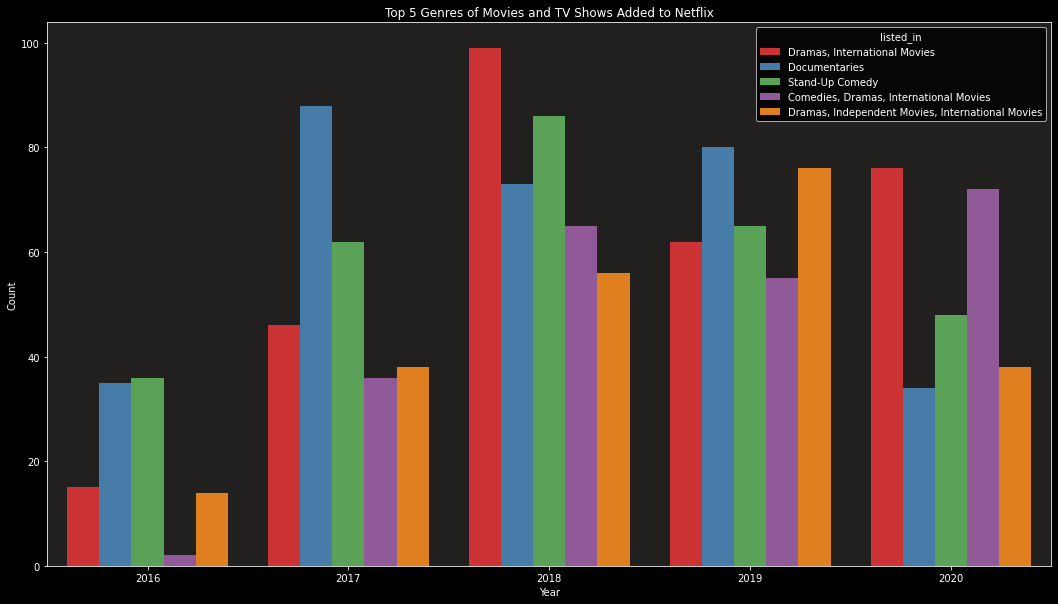

In [ ]:
#Fix colab background
plt.style.use('dark_background')
plt.figure(figsize=(18,10))
sns.countplot(x=netflix_ds['date_added'].dt.year, hue='listed_in', data=netflix_ds, palette='Set1', order=[2016,2017,2018,2019,2020], hue_order=netflix_ds['listed_in'].value_counts().index[:5])
#Background color
ax = plt.gca()
ax.set_facecolor('#221f1f')
#Label the plot
plt.title('Top 5 Genres of Movies and TV Shows Added to Netflix')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Observations:**

Reviewing the `listed_in` column, we observe that the most popular genre of: 

- movies on Netflix are `Dramas`
- TV Shows on Netflix are `International TV shows`

This is apparent as many of Netflix's popular TV shows fall under these genres.

Netflix can use this information to add or remove content to its library based on the popularity of its genre to save on licensing costs.

## 5. Growth of Drama Genre content **produced** by Netflix

Given the popularity of the drama genre on Netflix, we can explore the growth of content in the drama genre produced by Netflix.

Because the original dataset does not include information on producers, we used python libraries `beautifulsoup4` , `requests` to parse information on Netflix Originals. We then used `pandas` to create a dataframe of Netflix Originals in `Drama` genre.

### 5.1 Scraping and Importing Dataset

In [ ]:
#Installing beautifulsoup4 for web scraping
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing BeautifulSoup and requests
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

In [ ]:
# Get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_ended_Netflix_original_programming"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code) #200 means OK

200


In [ ]:
# Parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
netflix_originals_drama_table=soup.find('table',{'class':"wikitable"})

In [ ]:
netflix_originals_drama_ds=pd.read_html(str(netflix_originals_drama_table))
# convert list to dataframe
netflix_originals_drama_ds=pd.DataFrame(netflix_originals_drama_ds[0])
print(netflix_originals_drama_ds.head())

                     Title             Genre           Premiere  \
0           House of Cards   Political drama   February 1, 2013   
1            Hemlock Grove   Horror/thriller     April 19, 2013   
2  Orange Is the New Black      Comedy drama      July 11, 2013   
3               Marco Polo  Historical drama  December 12, 2014   
4                Bloodline          Thriller     March 20, 2015   

             Finale                 Seasons    Runtime   Notes  
0  November 2, 2018  6 seasons, 73 episodes  42–59 min     [1]  
1  October 23, 2015  3 seasons, 33 episodes  45–58 min  [2][a]  
2     July 26, 2019  7 seasons, 91 episodes  50–92 min     [3]  
3      July 1, 2016  2 seasons, 20 episodes  48–65 min     [4]  
4      May 26, 2017  3 seasons, 33 episodes  48–68 min     [5]  


In [ ]:
#Export to CSV for manual verification
netflix_originals_drama_ds.to_csv('netflix_originals_ds_drama.csv', index=False)

In [ ]:
#Drop notes column as it is not needed
netflix_originals_drama_ds.drop(['Notes'], axis=1, inplace=True)

In [ ]:
#Split Seasons Column into two columns
netflix_originals_drama_ds[['Seasons_Only','Episodes']] = netflix_originals_drama_ds['Seasons'].str.split(',',expand=True)
netflix_originals_drama_ds.head()

,Title,Genre,Premiere,Finale,Seasons,Runtime,Seasons_Only,Episodes
0,House of Cards,Political drama,"February 1, 2013","November 2, 2018","6 seasons, 73 episodes",42–59 min,6 seasons,73 episodes
1,Hemlock Grove,Horror/thriller,"April 19, 2013","October 23, 2015","3 seasons, 33 episodes",45–58 min,3 seasons,33 episodes
2,Orange Is the New Black,Comedy drama,"July 11, 2013","July 26, 2019","7 seasons, 91 episodes",50–92 min,7 seasons,91 episodes
3,Marco Polo,Historical drama,"December 12, 2014","July 1, 2016","2 seasons, 20 episodes",48–65 min,2 seasons,20 episodes
4,Bloodline,Thriller,"March 20, 2015","May 26, 2017","3 seasons, 33 episodes",48–68 min,3 seasons,33 episodes


In [ ]:
#Convert Premiere column to datetime
netflix_originals_drama_ds['Premiere'] = pd.to_datetime(netflix_originals_drama_ds['Premiere'])
#Convert Finale column to datetime
netflix_originals_drama_ds['Finale'] = pd.to_datetime(netflix_originals_drama_ds['Finale'])

In [ ]:
#Dtypes of the columns
netflix_originals_drama_ds.dtypes

Title                   object
Genre                   object
Premiere        datetime64[ns]
Finale          datetime64[ns]
Seasons                 object
Runtime                 object
Seasons_Only            object
Episodes                object
dtype: object

### 5.2 Analysis

#### 5.2.1 Exploring Season Length of Netflix Originals in the Drama Genre

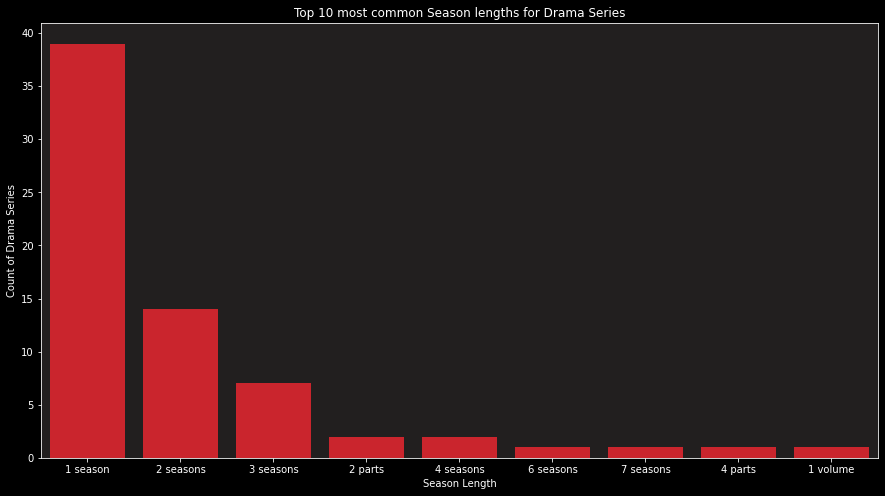

In [ ]:
#Dark Background snippet to fix colab bug
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
sns.countplot(x='Seasons_Only', data=netflix_originals_drama_ds, color='#e50914', order=netflix_originals_drama_ds['Seasons_Only'].value_counts().iloc[:10].index)
#Background color hex code for the plot
ax = plt.gca()
ax.set_facecolor('#221f1f')
plt.title('Top 10 most common Season lengths for Drama Series')
plt.xlabel('Season Length')
plt.ylabel('Count of Drama Series')
plt.show()

In continuation of our previous analysis, we still observe 1 season TV shows as the most popular season-length on Netflix.

#### 5.2.2 Word Cloud of Netflix Originals titles in the Drama Genre

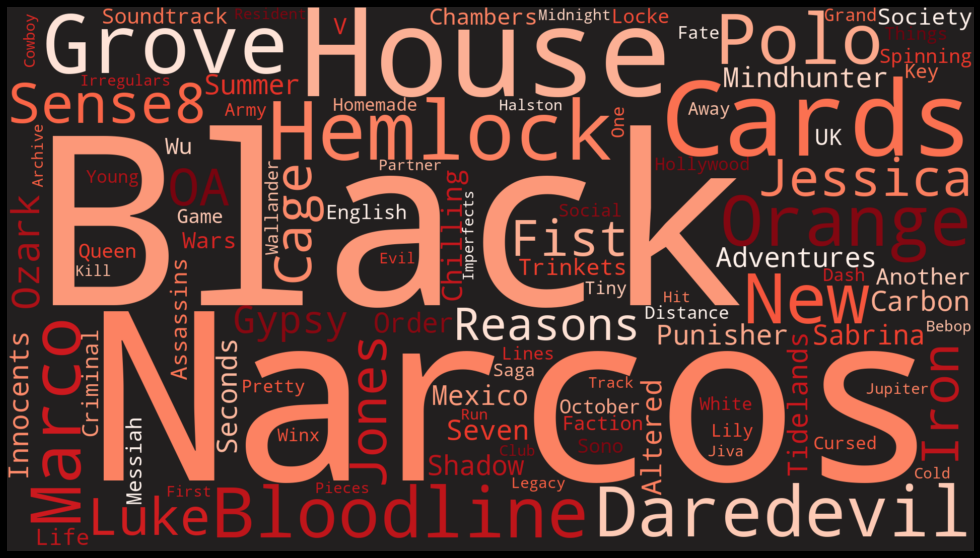

In [ ]:
#Black Background snippet to fix colab bug
plt.style.use('dark_background')

#Word cloud of titles of Drama Series
from turtle import width
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Word cloud of titles of Drama Series
wordcloud = WordCloud(width=1920,height=1080,background_color="#221f1f", max_words=1000, contour_width=2, contour_color='steelblue', colormap='Reds')
wordcloud.generate(' '.join(netflix_originals_drama_ds['Title']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The wordcloud brings some, if not the most poular, titles of Netflix Originals in the Drama Genre. Some of the most popular titles observed are:

1. 'House of Cards'
2. 'Orange is the New Black'
3. 'Narcos'
4. 'Punisher'
5. 'DareDevil'

**Knowing the success these shows have had, this highlights the importance of the drama genre for Netflix and its original content production.**

#### 5.2.3. Time Series Analysis of Netflix Originals in the Drama Genre

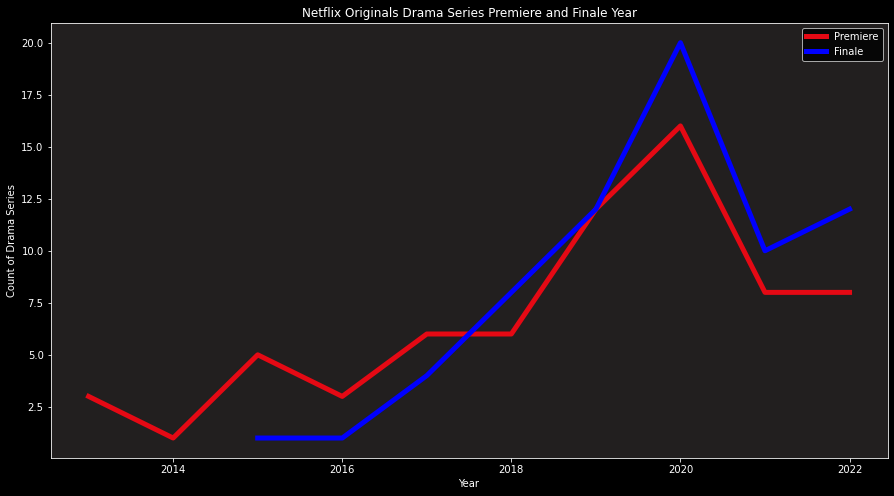

In [ ]:
#Plot time series of Premiere and Finale Year
#Dark Background snippet to fix colab bug
plt.style.use('dark_background')
#Color red for Premiere and Red for Finale
netflix_originals_drama_ds.groupby(netflix_originals_drama_ds['Premiere'].dt.year)['Premiere'].count().plot(color='#E50914', linewidth = 5, label='Premiere', figsize=(15,8))
netflix_originals_drama_ds.groupby(netflix_originals_drama_ds['Finale'].dt.year)['Finale'].count().plot(color='blue', linewidth = 5, label='Finale', figsize=(15,8))
#Background color hex code for the plot
ax = plt.gca()
ax.set_facecolor('#221f1f')
#Show legend
plt.legend()
#Plot title
plt.title('Netflix Originals Drama Series Premiere and Finale Year')
#X axis label
plt.xlabel('Year')
#Y axis label
plt.ylabel('Count of Drama Series')
#Show plot
plt.show()

The number of Netflix Originals in the `Drama` genre has been increasing over the years. 

We also observe that many Netflix Originals in the `Drama` genre was released between 2018 and 2020. In addition, we notice that Netflix has been able to substitute the shows that were ending with newer shows that were premiering in the same genre.



## 6. Understanding Netflix Content Addition Timing practices.

Given that we have information on `dateadded` and `release_year`, we can explore the timing of new Netflix content addition.

### 6.1 Month of Addition analysis

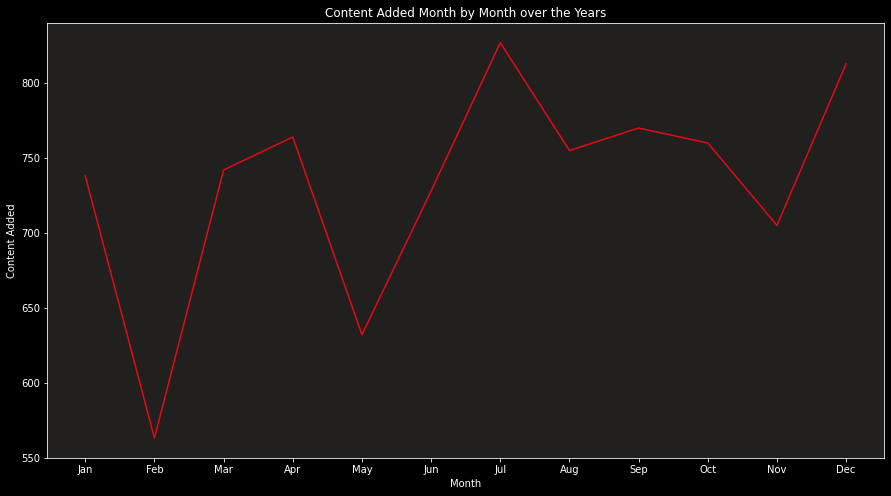

In [ ]:
#Fix the black colab background
plt.style.use('dark_background')
#Plot content added month by month
netflix_ds['date_added'].dt.month.value_counts().sort_index().plot(kind='line', figsize=(15,8), color='#E50914')
#Background color
ax = plt.gca()
ax.set_facecolor('#221f1f')
#X axis in order of Months and not in numbers
plt.xticks(np.arange(1,13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
#Label the plot
plt.xlabel('Month')
plt.ylabel('Content Added')
plt.title('Content Added Month by Month over the Years')
plt.show()

**Observations**:

Netflix has a heavy preference for adding content in the months of `July`, `August`, `September`, and `December`. The reason behind this is likely that people on holiday spend more leisure time watching Netflix.

### 6.2 Day of Addition analysis

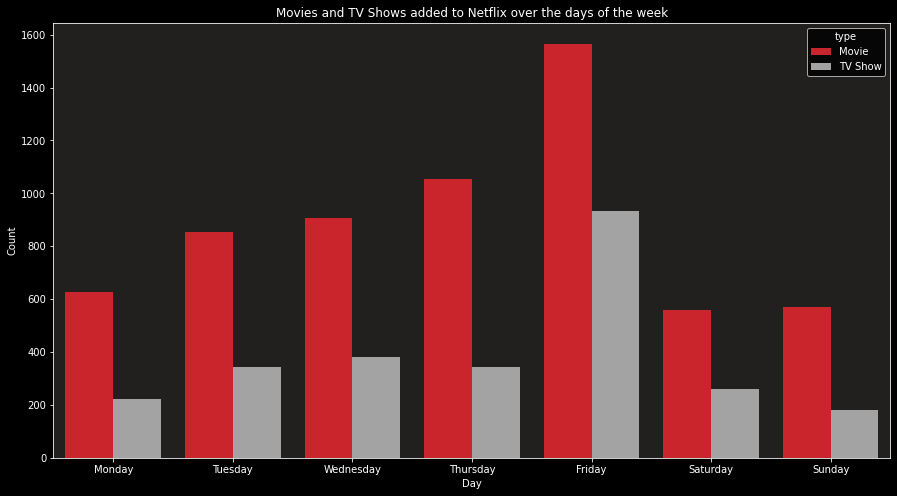

In [ ]:
#Plot and Hue by type the days of the week when content was added to Netflix
#Create a column of date added day of the week
netflix_ds['date_added_day'] = netflix_ds['date_added'].dt.day_name()
plt.figure(figsize=(15,8))
#Sort the days of the week
sns.countplot(x='date_added_day', data=netflix_ds, hue='type', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=['#E50914', '#a3a3a3'])
#Background color
ax = plt.gca()
ax.set_facecolor('#221f1f')
#Label the plot
plt.title('Movies and TV Shows added to Netflix over the days of the week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

**Observations**

Netflix shows a heavy preference for adding content on Fridays as opposed to Sundays, which is the least preferred day for content additions on Netflix. In our research, this tracks well with industry practice.

We found it interesting to note that Sundays were less preferred than Mondays. Based on our research, to provide a convenient time for viewers to binge-watch Netlix's content, Netflix follows a practice to add TV shows preferably on Fridays.

## 7. Which country's content is added to Netflix the most?

### 7.1 Top 10 Countries with the most content added to Netflix overall

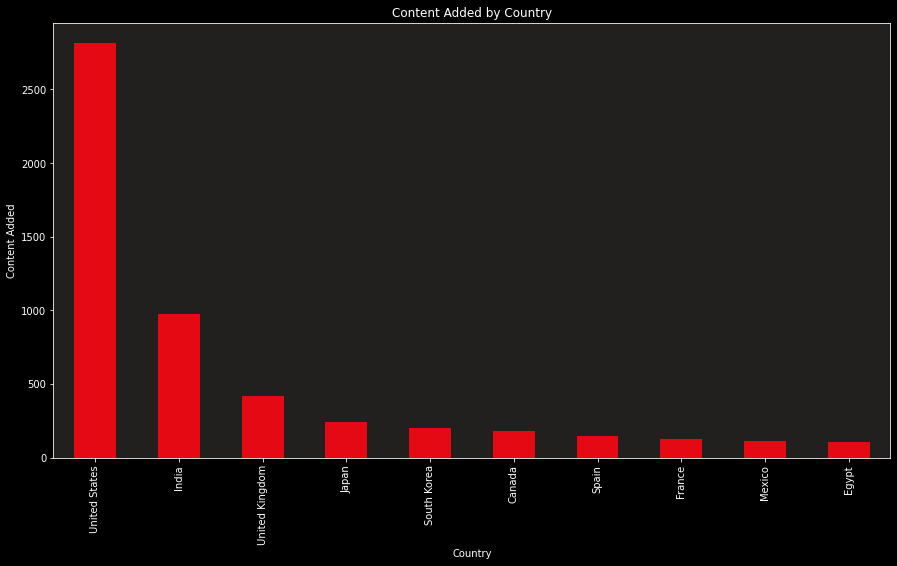

In [ ]:
#Fix colab background
plt.style.use('dark_background')
#Plot countries column except 'Not Listed'
netflix_ds[netflix_ds['country']!='Not Listed']['country'].value_counts().head(10).plot(kind='bar', figsize=(15,8), color='#E50914')
#background color
ax = plt.gca()
ax.set_facecolor('#221f1f')
#Label the plot
plt.xlabel('Country')
plt.ylabel('Content Added')
plt.title('Content Added by Country')
plt.show()

### 7.2 Top 10 Countries with the most content TV Shows added to Netflix overall

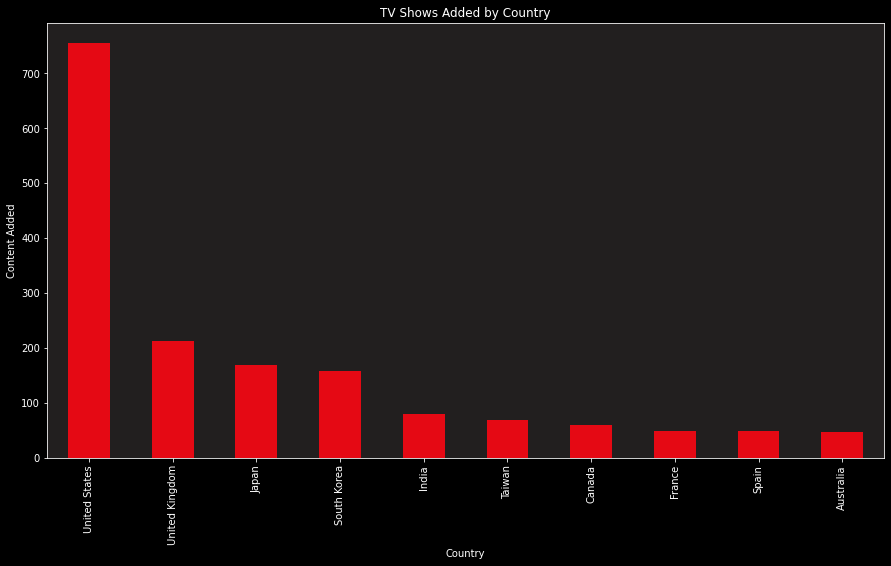

In [ ]:
#Fix colab background
plt.style.use('dark_background')
#Plot countries column except 'Not Listed' and only for TV Shows
netflix_ds[(netflix_ds['country']!='Not Listed') & (netflix_ds['type']=='TV Show')]['country'].value_counts().head(10).plot(kind='bar', figsize=(15,8), color='#E50914')
#background color
ax = plt.gca()
ax.set_facecolor('#221f1f')
#Label the plot
plt.xlabel('Country')
plt.ylabel('Content Added')
plt.title('TV Shows Added by Country')
plt.show()

**Observations**

Most content added to Netflix was produced in the US. This is likely because the US is the largest market for Netflix. We also observe that the second-most produced content has been in India. This indicates Netflix's targeted demographic.

On the other hand, our analysis indicates that the US, the UK, Japan, and South Korea produce most of Netflix's TV shows. Over the years, Netflix has invested more capital into producing original content in Asia. Thus, we can assume that investments are allocated toward producing Japanese and South Korean TV shows.

## 8. Netflix Content Dataset `Description` column Analysis

### 8.1. Wordcloud of Descriptions of Movies import libraries

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
#Take URL of the image and create a mask for the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib
import requests
url = "https://ik.imagekit.io/taw2awb5ntf/wp-content/uploads/2021/01/netflix-logo-1-2048x1152.png"
response = requests.get(url)
img = Image.open(urllib.request.urlopen(url))
mask = np.array(img)

def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val


In [ ]:
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

### 8.2. Wordcloud Visualization in the shape of a Netflix Logo

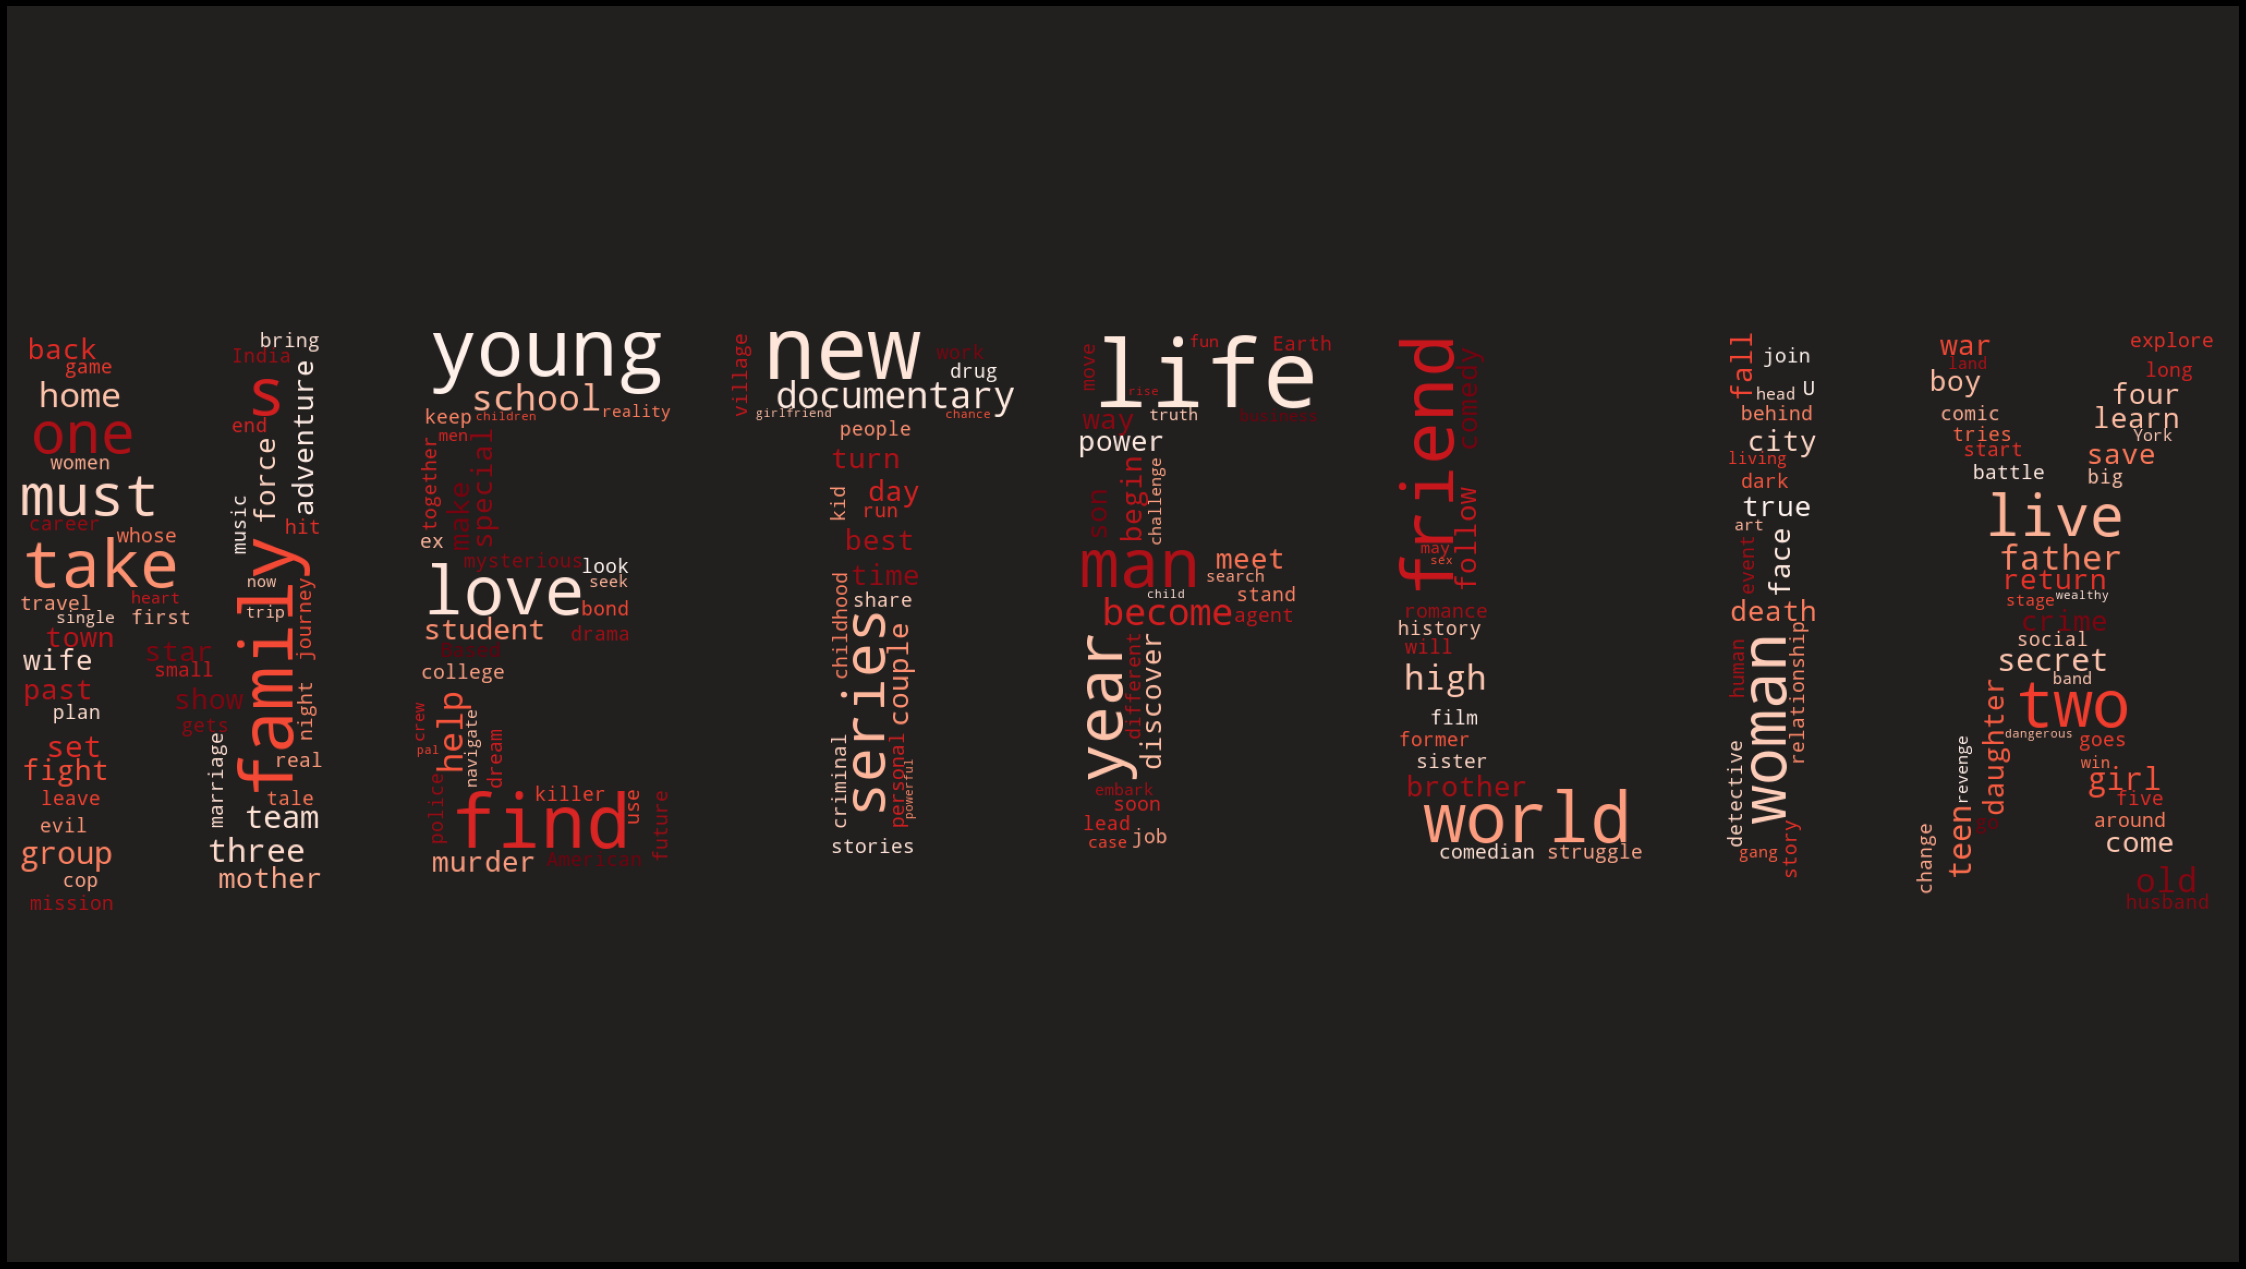

In [ ]:
description = " ".join(description for description in netflix_ds.description)

wordcloud = WordCloud(width = 3000, height = 2000, random_state=42, background_color='#221f1f', colormap='Reds', collocations=False, stopwords = STOPWORDS, mask=maskable_image).generate(description)
def plot_cloud(wordcloud):
    # Adjust the figure size
    plt.figure(figsize=(40, 30))
    # Display the word cloud
    plt.imshow(wordcloud) 
    # Remove the axis details and names
    plt.axis("off");
plot_cloud(wordcloud)
#wordcloud.to_file("netflix-wordcloud.png")

**Observations:**

It is not surprising that the words `love`, `life`, `friend`, and `family` are the most commonly used words in the descriptions of movies on Netflix. This tracks well with the fact that the most popular genre of Movies on Netflix is `Dramas`.

**Expanding onto further datasets:**

After we analyzed the Netflix dataset, we have identified the following questions that we would like to answer:

* How has Netflix stock performed over the years?
* How is Netflix stock performing compared to other companies in the same industry?
* How has Netflix Subscriber growth performed over the years?
* How has Netflix performed in comparison to its competitor such as Disney+?
* How is Netflix spending its money?

## 9. How has Netflix stock performed over the years?

### 9.1. Importing Stock Data

In [2]:
#Installing yfinance to get stock data
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 305 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
#Importing libraries
import yfinance as yf

In [4]:
faang = yf.download('META AMZN NFLX GOOG AAPL', start='2016-01-01', end='2022-12-01', progress=False)
faang.head(3)

Adj Close                                                \
                 AAPL       AMZN       GOOG        META        NFLX   
Date                                                                  
2016-01-04  24.111498  31.849501  37.091999  102.220001  109.959999   
2016-01-05  23.507284  31.689501  37.129002  102.730003  107.660004   
2016-01-06  23.047249  31.632500  37.181000  102.970001  117.680000   

                Close                                                ...  \
                 AAPL       AMZN       GOOG        META        NFLX  ...   
Date                                                                 ...   
2016-01-04  26.337500  31.849501  37.091999  102.220001  109.959999  ...   
2016-01-05  25.677500  31.689501  37.129002  102.730003  107.660004  ...   
2016-01-06  25.174999  31.632500  37.181000  102.970001  117.680000  ...   

                 Open                                                \
                 AAPL       AMZN       GOOG        META        NFLX   
Date                                                                  
2016-01-04  25.652500  32.814499  37.150002  101.949997  109.000000   
2016-01-05  26.437500  32.342999  37.322498  102.889999  110.449997   
2016-01-06  25.139999  31.100000  36.500000  101.129997  105.290001   

               Volume                                           
                 AAPL       AMZN      GOOG      META      NFLX  
Date                                                            
2016-01-04  270597600  186290000  65456000  37912400  20794800  
2016-01-05  223164000  116452000  39014000  23258200  17664600  
2016-01-06  273829600  106584000  38940000  25096200  33045700  

[3 rows x 30 columns]

### 9.2. Visualizing `FAANG` Stock Data

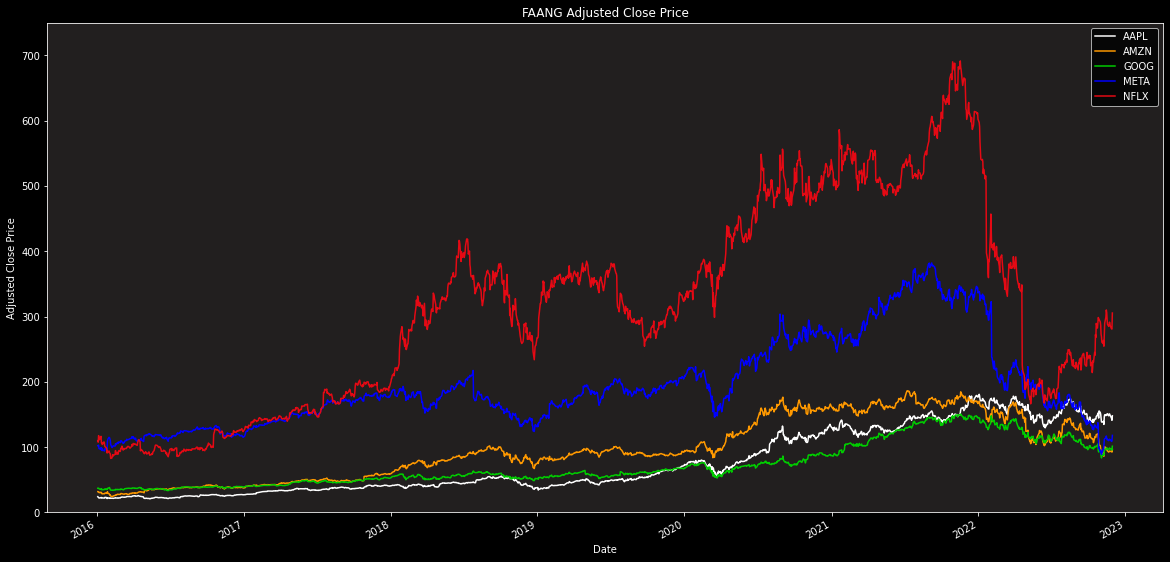

In [ ]:
#Black background style for colaboratory
plt.style.use('dark_background')
#Plotting the adjusted close price of FAANG stocks and coloring them according to their respective companies
faang['Adj Close'].plot(figsize=(20, 10), title='FAANG Adjusted Close Price', color=['#FFFFFF', '#FF9900', '#00CC00', '#0000FF', '#E50914'])
#Background color
ax = plt.gca()
ax.set_facecolor('#221f1f')
#Adding a legend
plt.legend(faang['Adj Close'].columns.values)
#X-axis label
plt.xlabel('Date')
#Y-axis length
plt.ylim(0, 750)
#Y-axis label
plt.ylabel('Adjusted Close Price')
#Displaying the plot
plt.show()

**Observations:**

* Netflix stock has performed reasonably well over the years in the FAANG group. However, it has not performed as well as Amazon and Apple and has suffered a significant drop in 2021. We are aware that companies like Amazon and Apple are multinational conglomerates with an extremely diverse portfolio and competitive advantage. 

* The recent performance of Netflix can be attributed to the fact that the company has been facing competition from other streaming services such as Disney+ and HBO Max, which have been gaining traction in the market.


## 10. Netflix Revenue Growth - Quarter wise

###10.1 Import Revenue Data

In [13]:
#Web Scraping Subscriber Growth Data for Netflix and Disney+
#Importing libraries
import requests
from pandas import json_normalize
import pandas as pd
url = "https://atlas.jifo.co/api/connectors/353c6973-eb8f-483a-a56b-598111522757"
response = requests.get(url).json()
#Convert response dictionary to dataframe
revenue_growth = pd.DataFrame.from_dict(response)
revenue_growth

,data,fileName,sheetNames,version,refreshed
0,"[[Title 1, Title 2], [Launch date, 29 August 1...",Netflix App Data,Overview,46,1670369089000
1,"[[Date, Revenue ($mm)], [Q1 2011, 719], [Q2 20...",Netflix App Data,QRev,46,1670369089000
2,"[[Year, Revenue ($bn)], [2011, 3.1], [2012, 3....",Netflix App Data,ARev,46,1670369089000
3,"[[Year, US & Canada, EMEA, Latin America, Asia...",Netflix App Data,Rev_by_region,46,1670369089000
4,"[[Year, US & Canada, EMEA, Latin America, Asia...",Netflix App Data,ARPU_by_region,46,1670369089000
5,"[[Date, Net Income/Loss ($mm)], [Q1 2009, 22],...",Netflix App Data,QNetInc,46,1670369089000
6,"[[Date, Net Income/Loss ($mm)], [2011, 225], [...",Netflix App Data,ANetInc,46,1670369089000
7,"[[Year, Content spend ($bn)], [2016, 6.88], [2...",Netflix App Data,Content_spend,46,1670369089000
8,"[[Date, Subscribers (mm)], [Q3 2011, 21.5], [Q...",Netflix App Data,QSubs,46,1670369089000
9,"[[Date, Subscribers (mm)], [2011, 21.5], [2012...",Netflix App Data,ASubs,46,1670369089000


In [17]:
revenue_growth_dict =  revenue_growth['data'][1]

In [18]:
revenue_growth_ds = pd.DataFrame.from_dict(revenue_growth_dict) 
revenue_growth_ds = revenue_growth_ds.iloc[1: , :] #data modification
revenue_growth_ds.columns = ['Quarter', "Netflix Revenue (In millions)"] 
revenue_growth_ds["Netflix Revenue (In millions)"] = pd.to_numeric(revenue_growth_ds["Netflix Revenue (In millions)"], errors='coerce') #Changing data type


###10.2 Visualising Revenue data

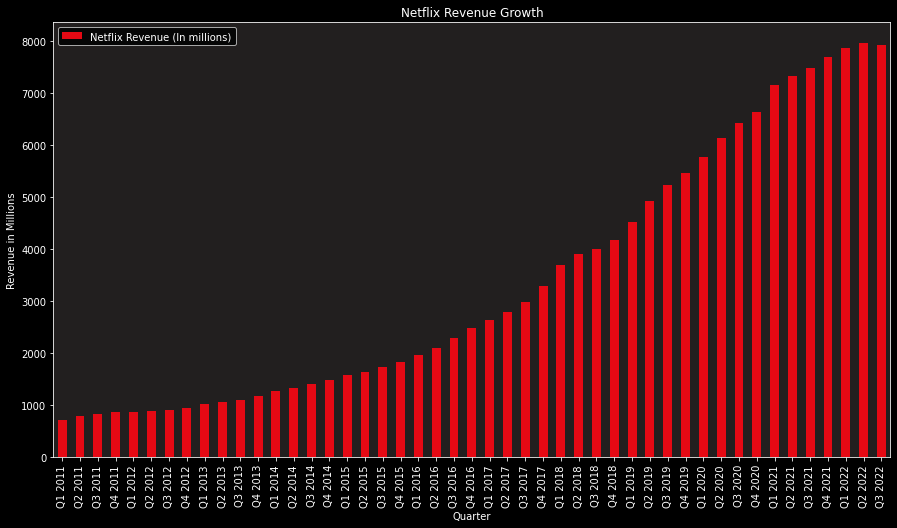

In [20]:
plt.style.use('dark_background')
import matplotlib.pyplot as plt
revenue_growth_ds.plot(x='Quarter', y='Netflix Revenue (In millions)', kind='bar', figsize=(15, 8), title='Netflix Revenue Growth', color='#E50914')
#Background color
#ax = plt.gca()
ax = plt.gca()
ax.set_facecolor('#221f1f')
#Adding a legend of Netflix subscribers
#plt.legend(['Netflix Revenue Count'])
#X-axis label
plt.xlabel('Quarter')
#Y-axis length
#plt.xlim(0, 300)
#years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
#ax.set_xticklabels(years)
#Y-axis label
plt.ylabel('Revenue in Millions')
#Displaying the plot
plt.show()

**Observations**

Though netflix has seen a consistent growth in its Revenue trend, we notice stagnation in the Revenue growth from Quarter 1 2021 to Quarter 3 2022. This highlights the pressing need of Netflix to re-invent its revenue growing strategy.

## 11. Subscriber Growth Trend of Netflix

### 11.1. Importing Subscriber Growth Data

In [22]:
#Web Scraping Subscriber Growth Data for Netflix and Disney+
#Importing libraries
import requests
from pandas import json_normalize

In [23]:
#Web scraping Netflix subscriber growth data and storing it in a dataframe
url = "https://atlas.jifo.co/api/connectors/353c6973-eb8f-483a-a56b-598111522757"
response = requests.get(url).json()
#Convert response dictionary to dataframe
subscribers_growth = pd.DataFrame.from_dict(response)
subscribers_growth.head()

,data,fileName,sheetNames,version,refreshed
0,"[[Title 1, Title 2], [Launch date, 29 August 1...",Netflix App Data,Overview,46,1670369089000
1,"[[Date, Revenue ($mm)], [Q1 2011, 719], [Q2 20...",Netflix App Data,QRev,46,1670369089000
2,"[[Year, Revenue ($bn)], [2011, 3.1], [2012, 3....",Netflix App Data,ARev,46,1670369089000
3,"[[Year, US & Canada, EMEA, Latin America, Asia...",Netflix App Data,Rev_by_region,46,1670369089000
4,"[[Year, US & Canada, EMEA, Latin America, Asia...",Netflix App Data,ARPU_by_region,46,1670369089000


In [24]:
#Dataset modiffications
subscribers_growth_dict = subscribers_growth['data'][11] #Slicing row with required data
subscribers_growth_ds = pd.DataFrame.from_dict(subscribers_growth_dict) #Converting to a dataframe
subscribers_growth_ds = subscribers_growth_ds.iloc[1: , :] #data modification
subscribers_growth_ds.columns = ['Quarter', "Netflix subs.count", "Disney subs.count"] #Assigning column names
subscribers_growth_ds["Netflix subs.count"] = pd.to_numeric(subscribers_growth_ds["Netflix subs.count"], errors='coerce') #Changing data type
subscribers_growth_ds["Disney subs.count"] = pd.to_numeric(subscribers_growth_ds["Disney subs.count"], errors='coerce')#Changing data type
net_sub = subscribers_growth_ds['Netflix subs.count'] #Subsetting
dis_sub = subscribers_growth_ds['Disney subs.count'] #Subsetting

subscribers_growth_ds.head()

,Quarter,Netflix subs.count,Disney subs.count
1,Q4 2019,167.0,27.0
2,Q1 2020,183.0,34.0
3,Q2 2020,193.0,58.0
4,Q3 2020,195.0,73.0
5,Q4 2020,204.0,95.0


### 11.2 Visualizing Subscriber Growth Data

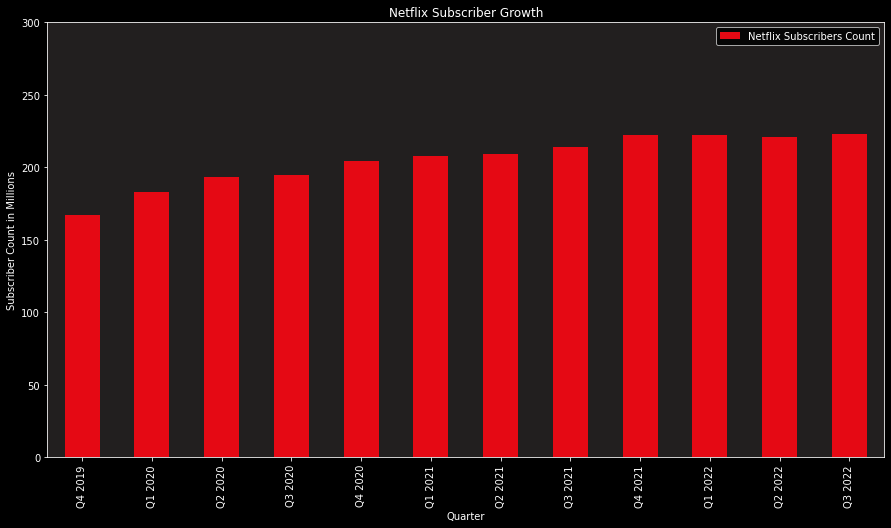

In [25]:
#Plot dn dataframe
subscribers_growth_ds.plot(x='Quarter', y='Netflix subs.count', kind='bar', figsize=(15, 8), title='Netflix Subscriber Growth', color='#E50914')
#Background color
ax = plt.gca()
ax.set_facecolor('#221f1f')
#Adding a legend of Netflix subscribers
plt.legend(['Netflix Subscribers Count'])
#X-axis label
plt.xlabel('Quarter')
#Y-axis length
plt.ylim(0, 300)
#Y-axis label
plt.ylabel('Subscriber Count in Millions')
#Displaying the plot
plt.show()

**Observations:**

* Netflix subscriber growth has been strong over the years. However, it has not been able to sustain the growth rate.
* Netflix peaked in 2020 and has been on a downward trend since then. This is likely because Netflix has been facing competition from other streaming services such as Disney+.

## 12. Netflix Subscriber Growth per Quarter and region

### 12.1. Importing Subscriber Growth Data per Quarter and Region

In [32]:
#Import subscriber growth region and quarter data from a csv file
subscribers_growth_region = pd.read_csv('/content/gdrive/Shareddrives/BA780/subscriber-growth-region-quarter.csv')
#Transpose the dataframe
subscribers_growth_region = subscribers_growth_region.T
#Assigning column names
#subscribers_growth_region.columns = ['Quarters','United States and Canada', 'Europe, Middle East, and Africa', 'Latin America', 'Asia Pacific']
#Make first row the column names
subscribers_growth_region.columns = subscribers_growth_region.iloc[0]
#Drop the first row
subscribers_growth_region = subscribers_growth_region.drop(subscribers_growth_region.index[0])
subscribers_growth_region.head()

Area,United States and Canada,"Europe, Middle East, and Africa",Latin America,Asia-Pacific
Q1 - 2018,60909000,29339000,21260000,7394000
Q2 - 2018,61870000,31317000,22795000,8372000
Q3 - 2018,63010000,33836000,24115000,9461000
Q4 - 2018,64757000,37818000,26077000,10607000
Q1 - 2019,66633000,42542000,27547000,12141000


In [33]:
#Convert data types to numeric
subscribers_growth_region['United States and Canada'] = pd.to_numeric(subscribers_growth_region['United States and Canada'], errors='coerce')
subscribers_growth_region['Europe, Middle East, and Africa'] = pd.to_numeric(subscribers_growth_region['Europe, Middle East, and Africa'], errors='coerce')
subscribers_growth_region['Latin America'] = pd.to_numeric(subscribers_growth_region['Latin America'], errors='coerce')
subscribers_growth_region['Asia-Pacific'] = pd.to_numeric(subscribers_growth_region['Asia-Pacific'], errors='coerce')
subscribers_growth_region.dtypes

Area
United States and Canada           int64
Europe, Middle East, and Africa    int64
Latin America                      int64
Asia-Pacific                       int64
dtype: object

In [34]:
#Convert millions into 2 digit numbers
subscribers_growth_region['United States and Canada'] = subscribers_growth_region['United States and Canada'] / 1000000
subscribers_growth_region['Europe, Middle East, and Africa'] = subscribers_growth_region['Europe, Middle East, and Africa'] / 1000000
subscribers_growth_region['Latin America'] = subscribers_growth_region['Latin America'] / 1000000
subscribers_growth_region['Asia-Pacific'] = subscribers_growth_region['Asia-Pacific'] / 1000000
subscribers_growth_region.head()

Area,United States and Canada,"Europe, Middle East, and Africa",Latin America,Asia-Pacific
Q1 - 2018,60.909,29.339,21.260,7.394
Q2 - 2018,61.870,31.317,22.795,8.372
Q3 - 2018,63.010,33.836,24.115,9.461
Q4 - 2018,64.757,37.818,26.077,10.607
Q1 - 2019,66.633,42.542,27.547,12.141


### 12.2. Visualizing Subscriber Growth Data

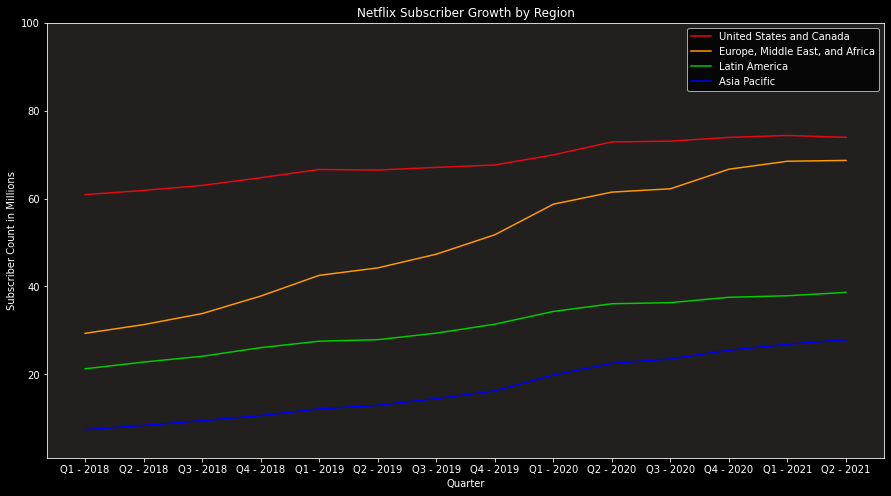

In [ ]:
#Plotting the subscriber growth region and quarter data
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_ylim(1, 100)
ax.set_xlabel('Quarter')
ax.set_ylabel('Subscriber Count in Millions')
ax.set_title('Netflix Subscriber Growth by Region')
ax.plot(subscribers_growth_region['United States and Canada'], color='#E50914')
ax.plot(subscribers_growth_region['Europe, Middle East, and Africa'], color='#FF9900')
ax.plot(subscribers_growth_region['Latin America'], color='#00CC00')
ax.plot(subscribers_growth_region['Asia-Pacific'], color='#0000FF')
#Adding a legend
ax.legend(['United States and Canada', 'Europe, Middle East, and Africa', 'Latin America', 'Asia Pacific'])
#Background color
ax.set_facecolor('#221f1f')

**Observations**
1. There has been stagnation in North America's subscriber count.
2. There has been a fair increase in Europe, Middle East, and Africa's subscriber count. 
3. Given the potential of the regions of Latin America and Asia Pacific, Netflix can clearly do better.

## 13. Subscribers Count vs Populations of Countries (Penetration Rate)

### 13.1. Importing Population and Subscriber Data

In [35]:
poulation_subscribers = pd.read_csv('/content/gdrive/Shareddrives/BA780/population-netflix-countries.csv')
poulation_subscribers.head()

,Country,% of Population with a Netflix Subscription,# of Netflix Subscribers,Population
0,Norway,36.59,1968164,5379480
1,New Zealand,25.80,1311696,5084300
2,Australia,24.94,6405917,25687040
3,United States of America,20.42,67278433,329484120
4,United Kingdom,18.97,12752006,67215290


In [36]:
#Rename columns
poulation_subscribers.columns = ['Country', 'Netflix Subscribers Percentage', 'Netflix Subscribers', 'Population']

In [37]:
#Convert data types to numeric
poulation_subscribers['Netflix Subscribers Percentage'] = pd.to_numeric(poulation_subscribers['Netflix Subscribers Percentage'], errors='coerce')
poulation_subscribers['Netflix Subscribers'] = pd.to_numeric(poulation_subscribers['Netflix Subscribers'], errors='coerce')
poulation_subscribers['Population'] = pd.to_numeric(poulation_subscribers['Population'], errors='coerce')
poulation_subscribers.dtypes

Country                            object
Netflix Subscribers Percentage    float64
Netflix Subscribers                 int64
Population                          int64
dtype: object

In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Add a new column with 3 digit ISO country codes from the country column
import pycountry
poulation_subscribers['ISO'] = poulation_subscribers['Country'].apply(lambda x: pycountry.countries.search_fuzzy(x)[0].alpha_3)

In [ ]:
poulation_subscribers.head()

,Country,Netflix Subscribers Percentage,Netflix Subscribers,Population,ISO
0,Norway,36.59,1968164,5379480,NOR
1,New Zealand,25.80,1311696,5084300,NZL
2,Australia,24.94,6405917,25687040,AUS
3,United States of America,20.42,67278433,329484120,USA
4,United Kingdom,18.97,12752006,67215290,GBR


### 13.2. Visualizing Percentage of Population subscribed to Netflix

In [ ]:
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#https://plotly.com/python/choropleth-maps/
#Visualize the percentage of Netflix subscribers in each country in a world map
import plotly_express as px
fig = px.choropleth(poulation_subscribers, locations="ISO", color="Netflix Subscribers Percentage", hover_name="Country",range_color=(0, 40), title='Percentage of Netflix Subscribers in Each Country', labels={'Netflix Subscribers Percentage':'Percentage of Netflix Subscribers'}, template='plotly_dark', width=1280, height=600, color_continuous_scale='Reds')
fig.show()

### 13.3 Static Map for Github Preview

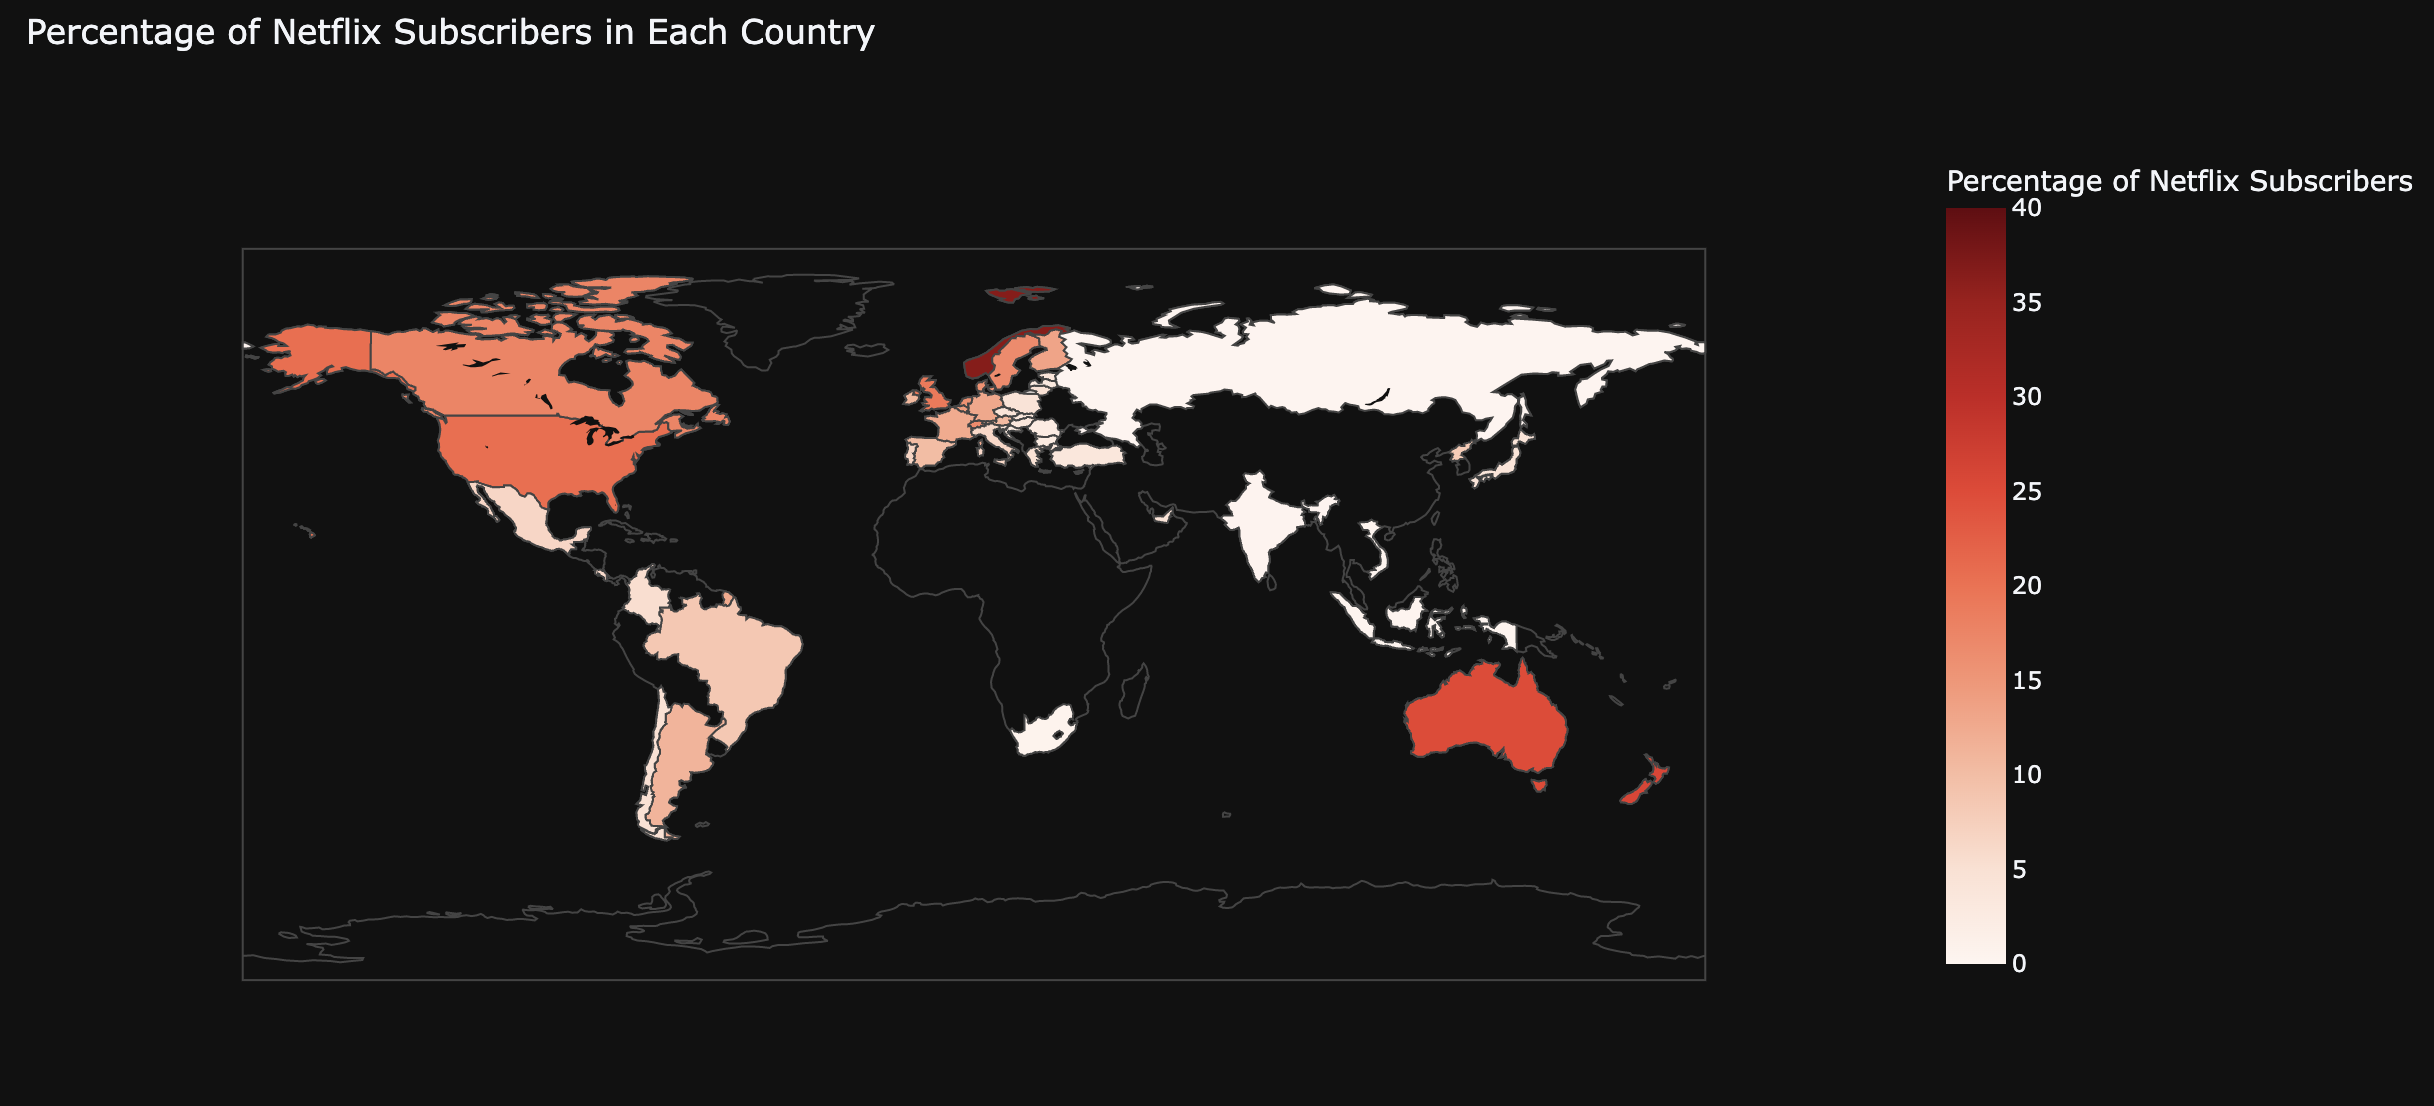

**Observations:**

* Netflix has a high penetration rate in the US, Canada, and the UK. 
* Netflix has a low penetration rate in India, Brazil, and Mexico.
* Netflix has the best penetration rate in Norway. This is likely due to the fact that Norway has a high GDP per capita and has a high disposable income.

From the source article "Comparitech",

> *One thing to consider here, too, is how recent statistics suggest a high number of people (41%) don’t pay for Netflix. 27 percent watch using the paid subscription of someone in their household, while 14 percent use a password shared with them from a friend or family member from outside their home. This would significantly increase the number of people accessing Netflix in each country.*

## **14. How has Netflix performed in comparison to its competitor such as Disney+?**

### 14.1. Visualizing `Disney+` and Netflix Subscriber Growth Data

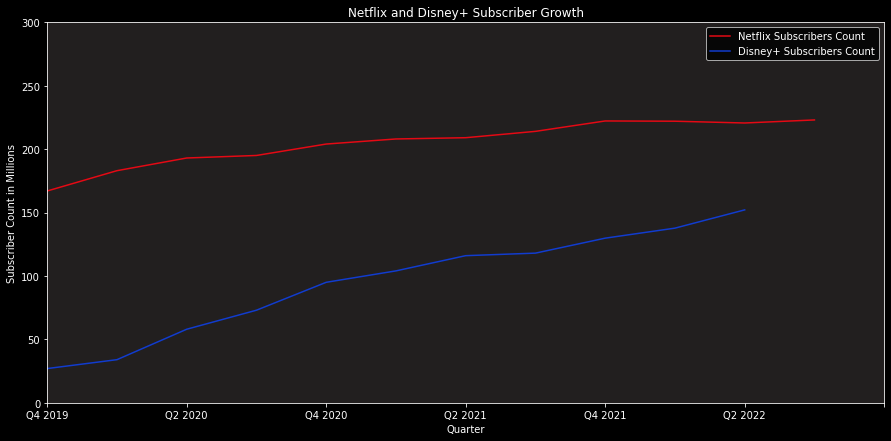

In [ ]:
#Plot line graph of dn dataframe comparing Netflix and Disney+ subscriber growth line graphs
subscribers_growth_ds.plot(x='Quarter', y=['Netflix subs.count', 'Disney subs.count'], figsize=(15, 7), title='Netflix and Disney+ Subscriber Growth', color=['#E50914', '#113CCF'])
#Background color
ax = plt.gca()
ax.set_facecolor('#221f1f')
#Adding a legend of Netflix Subscribers and Disney+ Subscribers
plt.legend(['Netflix Subscribers Count', 'Disney+ Subscribers Count'])
#X-axis label
plt.xlabel('Quarter')
#X-axis length till Q2 2022
plt.xlim(0, 12)
#Y-axis length
plt.ylim(0, 300)
#Y-axis label
plt.ylabel('Subscriber Count in Millions')
#Displaying the plot
plt.show()

**Observations:**

* Disney+ has been able to grow its subscriber base over the years at a faster rate than Netflix. This is likely due to the fact that Disney+ has also struck deals with AT&T and Verizon to offer memberships to their cellular network subscribers.
* Disney+ also has had deals with other companies such as ESPN and Hulu to provide content to its subscribers. This has helped Disney+ to gain traction in the market.
* Disney+ also has exclusive rights and ownership to megablockbuster intellectual property (IP) like Marvel, which in itself gained net billions of dollars over the years.

## **15. How is Netflix spending its money?**

Netflix Annual Cash Flow Statement (2021) is used to understand the company's cash flow. We can use this data to understand how Netflix is spending its money.

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 12,
      thickness = 40,
      line = dict(color = "black", width = 4),
      label = ["Total Revenue 2021", "Cost of Revenue ($17.3B)", "Licensed Content Amortization ($8.1B)", "Gross Profit ($12.4B)", "Marketing ($2.5B)", "Tech & Development ($2.3B)", "General & Admin ($1.4B)", "Operating Profit ($6.2B)", "Produced Content Amortization ($4.1B)", "Other Content Delivery Costs ($5.1B)"],
      color = "#E50914"
    ),
    link = dict(
      source = [0, 1, 0, 3, 3, 3, 3, 1, 1], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [1, 2, 3, 4, 5, 6, 7, 8, 9],
      value = [17.3, 8.1, 12.4, 2.5, 2.3, 1.4, 6.2, 4.1, 5.1]
  ))])

fig.update_layout(title_text="Netflix Expenditure Sankey Diagram", font_size=12, font_color = "White", title_font_color = "White", title_font_size = 20, title_x = 0.5, title_y = 0.95, title_xanchor = 'center', title_yanchor = 'top', paper_bgcolor = "#221f1f", plot_bgcolor = "#221f1f")
fig.show()

### 15.1 Static Image for Github Preview

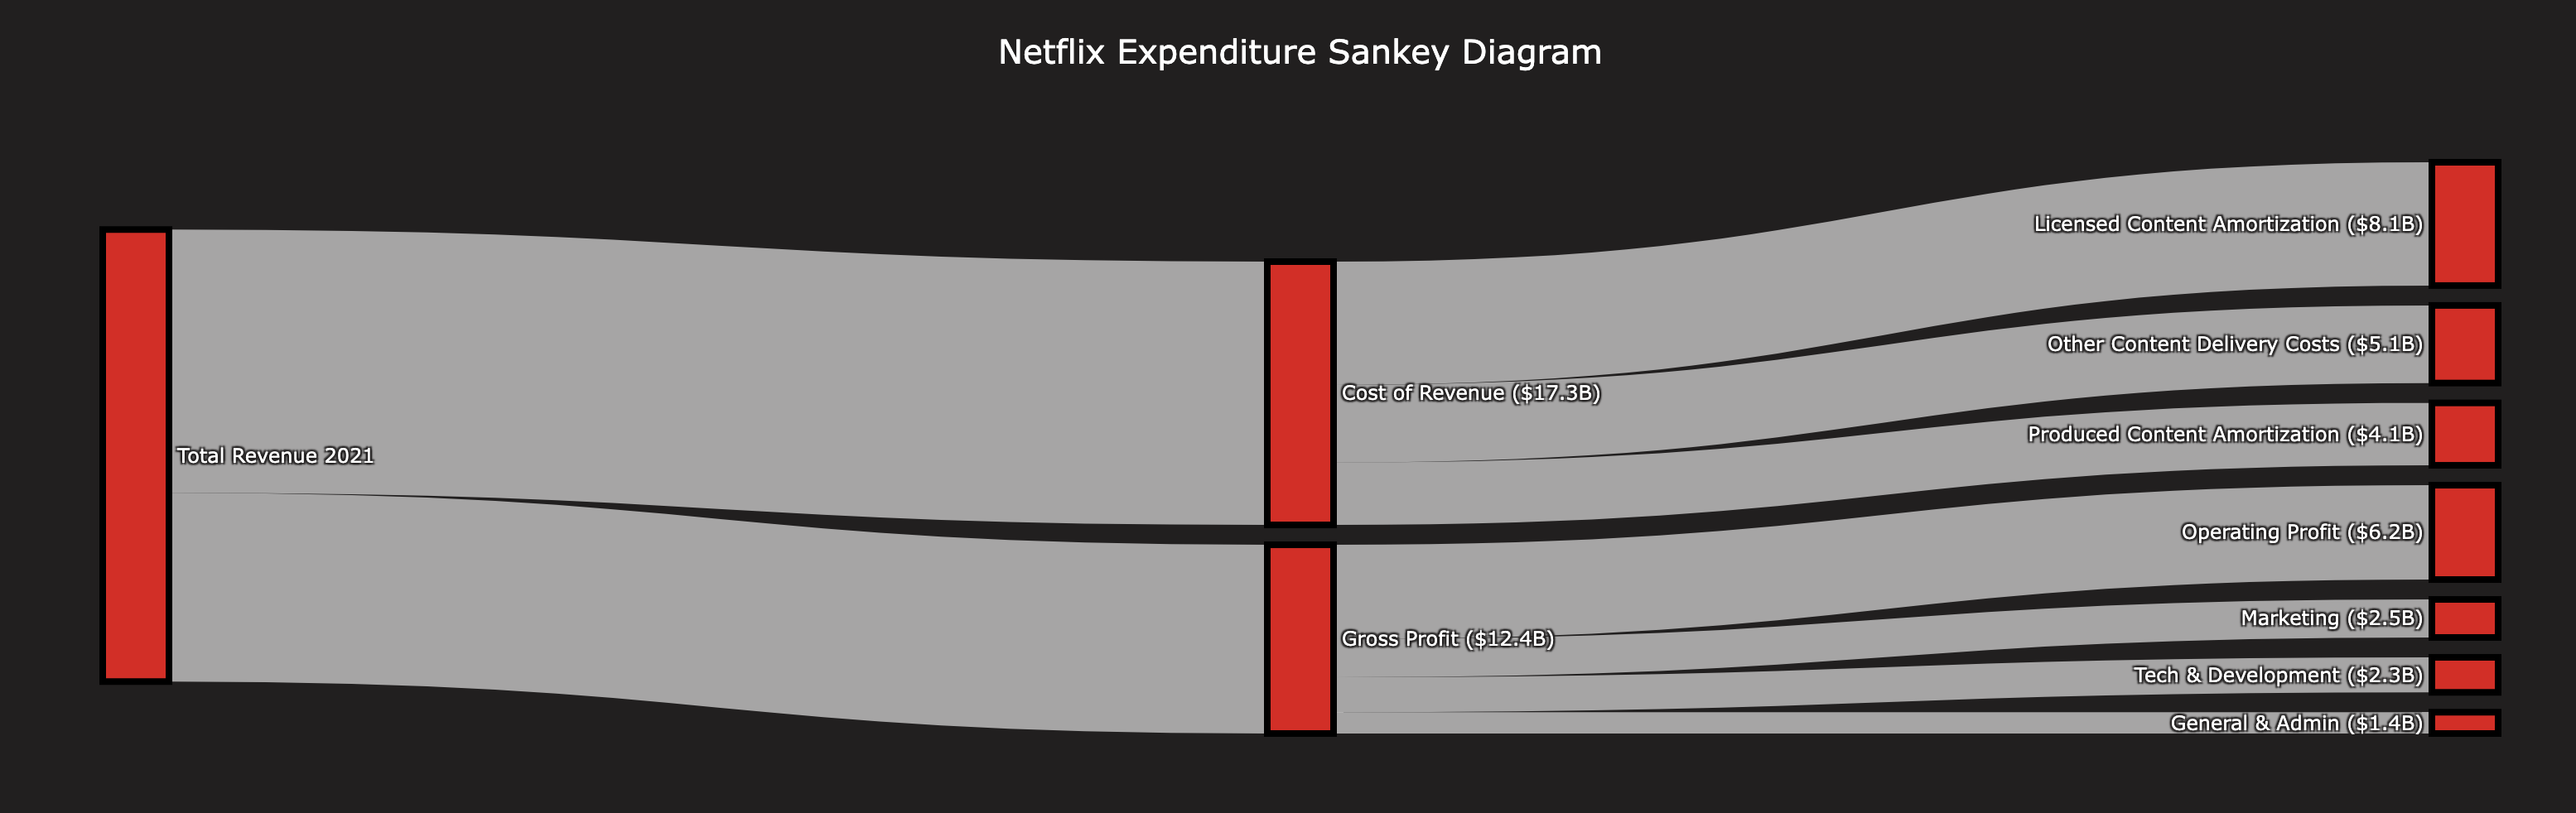

**Observations:**

* Netflix has been spending a lot of money on content over the years. 
* In 2021, Netflix's highest expenditure is on licensed content amortization, which is the amortization of copyrighted licenses Netflix pays for non-original Netflix content. 
* Its second highest expenditure is on other content delivery costs, which include maintaining its content delivery network (CDN) to improve content security, performance, and availability of its media. Netflix Open Connect delivers 100% of its video traffic, currently over 125 million hours of viewing per day.
* Its third expenditure is allocated toward producing Netflix's original content.

# **<span id="Conclusion" style="color:#023e8a;">Conclusion</span>**


In this project, we have analyzed the Netflix dataset and have answered a few questions revolving around market penetration, content strategy, and more. In addition, we compared Netflix's performance with its competitors such as Disney+, analyzed its stock performance, and tracked subscriber growth over the years. We have also analyzed Netflix's cash flow statement to understand how Netflix's spending aligns with its overarching strategy, which is to ultimately sustain its position as the industry leader.

From the visualizations on Genre, we noticed `Drama` has played a big role in Netflix's content focus. From the viualizations on duration and season length, we noticed Netflix's focus on `1 season` shows and movies that range in the duration of `80-100 mins`. Subsequently, we reviewed Netflix's stock and its comparison to the group it's in (FAANG).

Looking at the visualizations of where the content is produced and the comparison of market penetration by subscribers, we know Netflix has long ways to go in the Asian markets.

In conclusion, although Netflix has been able to grow its subscriber base over the years, it has struggled to keep up with the growth. We have now also seen that this is likely due to the fact that Netflix has been facing competition from other streaming services such as Disney+ and HBO Max.

As such, we have the following recommendations for Netflix:

* **Netflix should focus on producing more original content in India, Brazil, and Mexico to increase its penetration rate in these countries.**
 - This is to decrease expenses on licensing costs and redirect investments toward building onto its intellectual property portfolio. Having ownership of IP over their movies/TV shows can inventivize more customers to stream on the Netflix platform.
* **Netflix should focus on capitalizing on its existing subscriber base by restricting password sharing.**
 - Given how the growth rate of subscribers has flatlined in North America and many other regions, it is important to stop the practice of password sharing and stimulate each user to have their own account. This gives Netflix the opportunity to convert unpaid subscribers to paid subscribers.
* **Netflix should come out with a new ad-supported tier to increase its revenue and subscriber base.**
 - Given how the growth rate of subscribers has flatlined in North America and many other regions, it is essential to introduce lucrative price points to maintain revenue increase.

# **<span id="References" style="color:#023e8a;">References</span>**


*  https://pandas.pydata.org/docs/user_guide/basics.html#basics-object-conversion
*  https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451
* https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
* https://www.holisticseo.digital/python-seo/word-cloud/
*  https://www.dataquest.io/blog/making-538-plots/
*  https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
*  https://www.kaggle.com/general/51898
*  https://www.imdb.com/
* https://www.kaggle.com/code/joshuaswords/netflix-data-visualization
* https://s22.q4cdn.com/959853165/files/doc_financials/2021/q4/da27d24b-9358-4b5c-a424-6da061d91836.pdf
* https://www.comparitech.com/tv-streaming/netflix-subscribers/
